<a href="https://colab.research.google.com/github/IqbalFikriRA/skripsi/blob/main/skenario1_pakaigridfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve,
    auc, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Tentukan path file CSV di Google Drive Anda
# Ganti path ini dengan lokasi sebenarnya file CSV Anda di Google Drive
file_path = '/content/drive/MyDrive/Dataset/dataset_link_phishing.csv'

Mounted at /content/drive


In [ ]:
# Load dataset langsung dari Google Drive
df = pd.read_csv(file_path)
print(" Data berhasil dimuat dari Google Drive!")

 Data berhasil dimuat dari Google Drive!


In [ ]:
print('Dataset sebelum di cleaning')
display(df.head())

Dataset sebelum di cleaning


,Unnamed: 0,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,3,http://www.jp519.com/,21,13,0,2,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [ ]:
# 2. Data Exploration dan Cleaning
print("\nMemeriksa informasi dataset...")
print(df.info())

# Pastikan kolom status adalah label
print("\nDistribusi label 'status':")
print(df['status'].value_counts())


Memeriksa informasi dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  19431 non-null  int64  
 1   url                         19431 non-null  object 
 2   url_length                  19431 non-null  int64  
 3   hostname_length             19431 non-null  int64  
 4   ip                          19431 non-null  int64  
 5   total_of.                   19431 non-null  int64  
 6   total_of-                   19431 non-null  int64  
 7   total_of@                   19431 non-null  int64  
 8   total_of?                   19431 non-null  int64  
 9   total_of&                   19431 non-null  int64  
 10  total_of=                   19431 non-null  int64  
 11  total_of_                   19431 non-null  int64  
 12  total_of~                   19431 non-null  int64  
 13 

In [ ]:
print("\nMemeriksa missing values...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Memeriksa missing values...
Series([], dtype: int64)


In [ ]:
# Memeriksa jumlah total baris dalam dataset
print(f"Jumlah total baris dalam dataset: {df.shape[0]}")

# Memeriksa jumlah baris duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Jika ingin menghapus duplikat (opsional)
df_no_duplicates = df.drop_duplicates(keep='first')
print(f"\nJumlah baris setelah menghapus duplikat: {df_no_duplicates.shape[0]}")

Jumlah total baris dalam dataset: 19431
Jumlah baris duplikat: 0

Jumlah baris setelah menghapus duplikat: 19431


In [ ]:
# Drop kolom pertama (index) jika tidak diperlukan
df.drop('Unnamed: 0', inplace=True, axis=1)
display(df.head())

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [ ]:
# Konversi label ke numerik jika belum
if df['status'].dtype == 'object':
    # Asumsikan 'phishing' = 1, 'legitimate' = 0
    df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
    print("\nKonversi label ke numerik:")
    print(df['status'].value_counts())

df["domain_with_copyright"] = list(map(lambda x : 1 if x == 'one' else 0 if x == 'zero' else 1 if x == 'One' else 0 if x == 'Zero' else x, df["domain_with_copyright"]))
df["domain_with_copyright"]=pd.to_numeric(df["domain_with_copyright"])
df["domain_with_copyright"]


Konversi label ke numerik:
status
0    9716
1    9715
Name: count, dtype: int64


,domain_with_copyright
0,1
1,0
2,0
3,1
4,0
...,...
19426,0
19427,0
19428,0
19429,0


In [ ]:
# 3. Pemisahan fitur dengan label
X = df.drop(['status', 'url'], axis=1)
y = df['status']

print(f"\nJumlah fitur: {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")


Jumlah fitur: 84
Jumlah sampel: 19431


In [ ]:
# 4. Pembagian dataset 80:10:10
# Langkah 1: Membagi data menjadi 80% training dan 20% sisanya
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Langkah 2: Membagi 20% sisanya menjadi 10% validasi dan 10% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"\nTrain set shape: {X_train.shape} ({X_train.shape[0]/X.shape[0]*100:.2f}%)")
print(f"Validation set shape: {X_val.shape} ({X_val.shape[0]/X.shape[0]*100:.2f}%)")
print(f"Test set shape: {X_test.shape} ({X_test.shape[0]/X.shape[0]*100:.2f}%)")


Train set shape: (15544, 84) (80.00%)
Validation set shape: (1943, 84) (10.00%)
Test set shape: (1944, 84) (10.00%)


In [ ]:
# Menampilkan 5 baris data asli sebelum standardisasi
print("Data asli (5 baris pertama):")
print(X_train.head())
print("\nStatistik data asli:")
print("Mean:")
print(X_train.mean())
print("\nStandar deviasi:")
print(X_train.std())

Data asli (5 baris pertama):
       url_length  hostname_length  ip  total_of.  total_of-  total_of@  \
13855          32               23   1          2          0          0   
16827          54               26   1          3          0          0   
17838          38               14   1          3          0          0   
1869           62               13   1          4          1          0   
1459           37               16   0          2          0          0   

       total_of?  total_of&  total_of=  total_of_  ...  empty_title  \
13855          0          0          0          0  ...            0   
16827          0          0          0          0  ...            0   
17838          0          0          0          0  ...            0   
1869           0          0          0          0  ...            1   
1459           0          0          0          0  ...            0   

       domain_in_title  domain_with_copyright  whois_registered_domain  \
13855              

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Menampilkan 5 baris data yang sudah distandardisasi
print("\nData setelah standardisasi (5 baris pertama):")
print(X_train_scaled_df.head())
print("\nStatistik data setelah standardisasi:")
print("Mean:")
print(X_train_scaled_df.mean())
print("\nStandar deviasi:")
print(X_train_scaled_df.std())


Data setelah standardisasi (5 baris pertama):
   url_length  hostname_length        ip  total_of.  total_of-  total_of@  \
0   -0.514026         0.169627  0.734069  -0.348934  -0.480656  -0.144219   
1   -0.129322         0.443368  0.734069   0.368409  -0.480656  -0.144219   
2   -0.409107        -0.651597  0.734069   0.368409  -0.480656  -0.144219   
3    0.010570        -0.742844  0.734069   1.085751  -0.001633  -0.144219   
4   -0.426593        -0.469103 -1.362269  -0.348934  -0.480656  -0.144219   

   total_of?  total_of&  total_of=  total_of_  ...  empty_title  \
0   -0.38913  -0.195925  -0.289529  -0.291992  ...    -0.373505   
1   -0.38913  -0.195925  -0.289529  -0.291992  ...    -0.373505   
2   -0.38913  -0.195925  -0.289529  -0.291992  ...    -0.373505   
3   -0.38913  -0.195925  -0.289529  -0.291992  ...     2.677341   
4   -0.38913  -0.195925  -0.289529  -0.291992  ...    -0.373505   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0         0.53718

In [ ]:
selector = RandomForestClassifier(random_state=42)
selector.fit(X_train_scaled, y_train)

# Pilih fitur penting berdasarkan feature importance
selector_model = SelectFromModel(selector, threshold='mean')
selector_model.fit(X_train_scaled, y_train)

# Terapkan feature selection
X_train_selected = selector_model.transform(X_train_scaled)
X_val_selected = selector_model.transform(X_val_scaled)
X_test_selected = selector_model.transform(X_test_scaled)

print(f"Jumlah fitur setelah feature selection: {X_train_selected.shape[1]}")

# Mendapatkan nama fitur yang terpilih
selected_features_indices = selector_model.get_support()
selected_features = X.columns[selected_features_indices]
print("\nFitur yang terpilih:")
for feature in selected_features:
    print(f"- {feature}")

Jumlah fitur setelah feature selection: 24

Fitur yang terpilih:
- url_length
- hostname_length
- total_of.
- total_of/
- total_of_www
- ratio_digits_url
- length_words_raw
- char_repeat
- shortest_word_host
- longest_words_raw
- longest_word_path
- avg_word_path
- phish_hints
- nb_hyperlinks
- ratio_intHyperlinks
- ratio_extHyperlinks
- ratio_extRedirection
- links_in_tags
- safe_anchor
- domain_registration_length
- domain_age
- web_traffic
- google_index
- page_rank


# **Train Model**


Random Forest Metrics:
Accuracy: 0.9830
Precision: 0.9865
Recall: 0.9794
F1-Score: 0.9829
Random Forest OOB Error: 0.0136
ROC AUC: 0.9986

Random Forest Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.98      0.99      0.98       972
    Phishing       0.99      0.98      0.98       971

    accuracy                           0.98      1943
   macro avg       0.98      0.98      0.98      1943
weighted avg       0.98      0.98      0.98      1943

Random Forest Confusion Matrix:


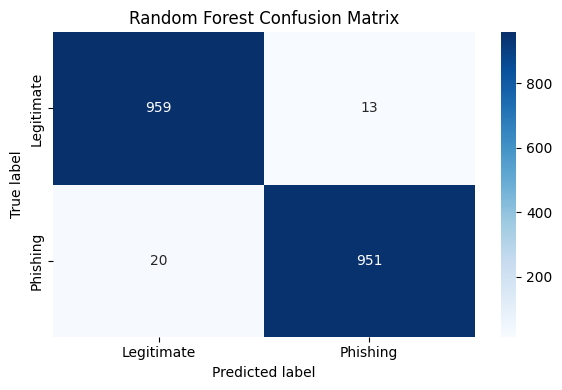

In [ ]:
rf_model = RandomForestClassifier(
    oob_score=True,  # Aktifkan OOB scoring
    random_state=42
)
# Melatih model
rf_model.fit(X_train_selected, y_train)

# Evaluasi pada validation set
y_val_pred_rf = rf_model.predict(X_val_selected)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
rf_precision = precision_score(y_val, y_val_pred_rf)
rf_recall = recall_score(y_val, y_val_pred_rf)
rf_f1 = f1_score(y_val, y_val_pred_rf)
y_val_proba_rf = rf_model.predict_proba(X_val_selected)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_proba_rf)
rf_roc_auc = auc(fpr_rf, tpr_rf)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"Random Forest OOB Error: {1 - rf_model.oob_score_:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_val, y_val_pred_rf, target_names=['Legitimate', 'Phishing']))

plt.figure(figsize=(6, 4))
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
print("Random Forest Confusion Matrix:")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


HASIL EVALUASI RANDOM FOREST MODEL
Accuracy            : 0.9830
Precision           : 0.9865
Recall              : 0.9794
F1-Score            : 0.9829
Loss (1 - Accuracy) : 0.0170
OOB Error           : 0.0136
ROC AUC             : 0.9986

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

  Legitimate       0.98      0.99      0.98       972
    Phishing       0.99      0.98      0.98       971

    accuracy                           0.98      1943
   macro avg       0.98      0.98      0.98      1943
weighted avg       0.98      0.98      0.98      1943



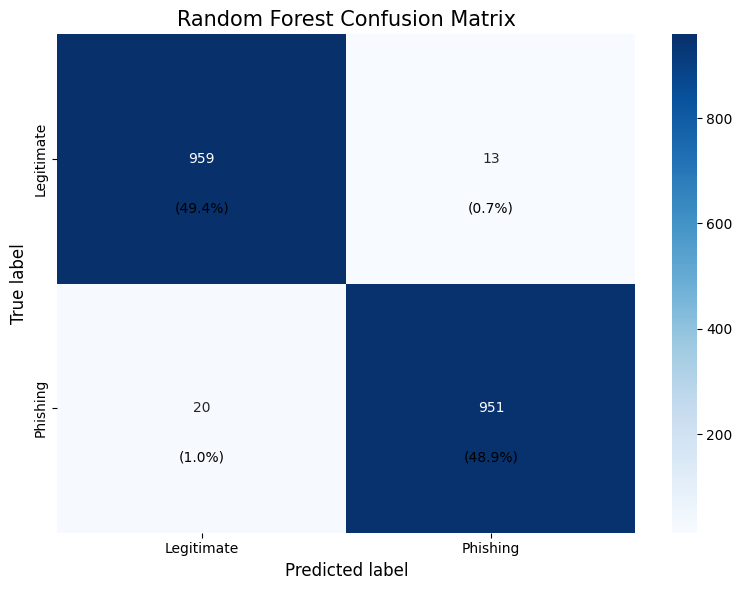

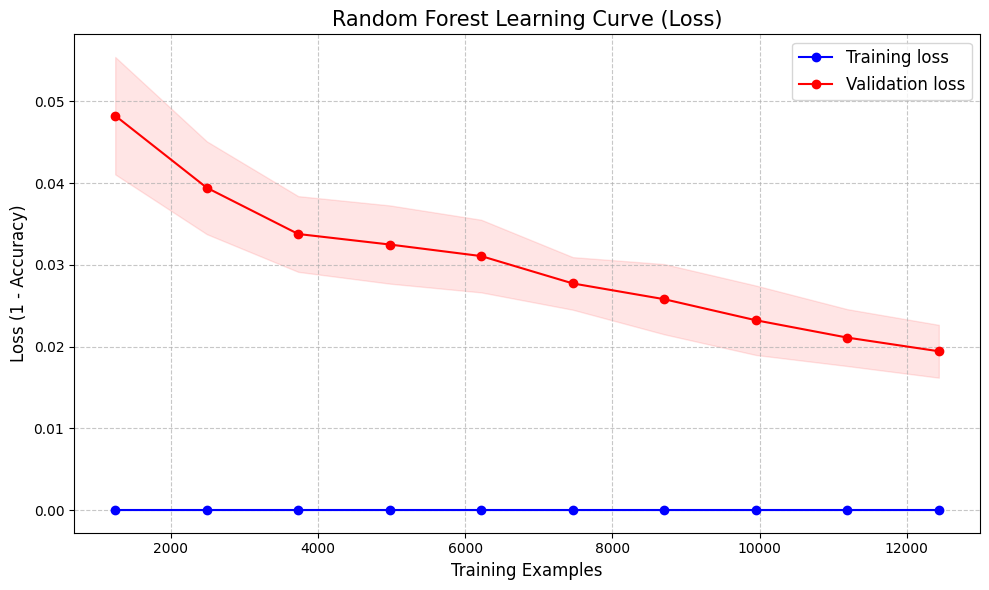


--- Random Forest Loss Analysis ---
Training Loss: 0.0000
Validation Loss: 0.0194
Gap Loss (|Training - Validation|): 0.0194
Interpretasi: Model cukup seimbang, dengan sedikit tanda overfitting yang masih dalam batas wajar


In [ ]:
# Tampilkan metrik dalam format yang rapi
print("\n" + "="*50)
print("HASIL EVALUASI RANDOM FOREST MODEL")
print("="*50)

# Tampilkan metrik dalam format tabel
rf_loss = 1 - rf_accuracy
metrics_rf = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'Loss (1 - Accuracy)': rf_loss,
    'OOB Error': 1 - rf_model.oob_score_,
    'ROC AUC': rf_roc_auc
}

for metric, value in metrics_rf.items():
    print(f"{metric:<20}: {value:.4f}")

# Classification Report dalam format yang lebih rapi
print("\n--- Random Forest Classification Report ---")
cr_rf = classification_report(y_val, y_val_pred_rf, target_names=['Legitimate', 'Phishing'])
print(cr_rf)

# Visualisasi Confusion Matrix yang lebih baik
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])

# Tambahkan anotasi persentase di setiap sel confusion matrix
total = np.sum(cm_rf)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j+0.5, i+0.7, f'({cm_rf[i, j]/total:.1%})',
                 ha='center', va='center')

plt.title('Random Forest Confusion Matrix', fontsize=15)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Hitung learning curve untuk Random Forest
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X_train_selected, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate loss (1 - accuracy)
rf_train_loss = 1 - np.mean(train_scores, axis=1)
rf_val_loss = 1 - np.mean(val_scores, axis=1)

# Plot learning curve (loss)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, rf_train_loss, 'o-', color='blue', label='Training loss')
plt.plot(train_sizes, rf_val_loss, 'o-', color='red', label='Validation loss')
plt.fill_between(train_sizes,
                 rf_train_loss - np.std(1-train_scores, axis=1),
                 rf_train_loss + np.std(1-train_scores, axis=1),
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 rf_val_loss - np.std(1-val_scores, axis=1),
                 rf_val_loss + np.std(1-val_scores, axis=1),
                 alpha=0.1, color='red')
plt.title('Random Forest Learning Curve (Loss)', fontsize=15)
plt.xlabel('Training Examples', fontsize=12)
plt.ylabel('Loss (1 - Accuracy)', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('rf_learning_curve_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis loss
print("\n--- Random Forest Loss Analysis ---")
print(f"Training Loss: {rf_train_loss[-1]:.4f}")  # Loss pada full training set
print(f"Validation Loss: {rf_val_loss[-1]:.4f}")  # Loss pada validation set
gap = abs(rf_train_loss[-1] - rf_val_loss[-1])
print(f"Gap Loss (|Training - Validation|): {gap:.4f}")

# Interpretasi loss
if rf_train_loss[-1] < rf_val_loss[-1]:
    if gap > 0.05:
        interpretation = "Model cenderung overfitting (training loss lebih rendah dari validation loss secara signifikan)"
    else:
        interpretation = "Model cukup seimbang, dengan sedikit tanda overfitting yang masih dalam batas wajar"
elif rf_train_loss[-1] > rf_val_loss[-1]:
    interpretation = "Situasi tidak umum - validation loss lebih rendah dari training loss"
else:
    interpretation = "Model sangat seimbang (training loss = validation loss)"

print(f"Interpretasi: {interpretation}")


SVM Metrics:
Accuracy: 0.9552
Precision: 0.9633
Recall: 0.9464
F1-Score: 0.9548
ROC AUC: 0.9887

SVM Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      0.96      0.96       972
    Phishing       0.96      0.95      0.95       971

    accuracy                           0.96      1943
   macro avg       0.96      0.96      0.96      1943
weighted avg       0.96      0.96      0.96      1943

SVM Confusion Matrix:


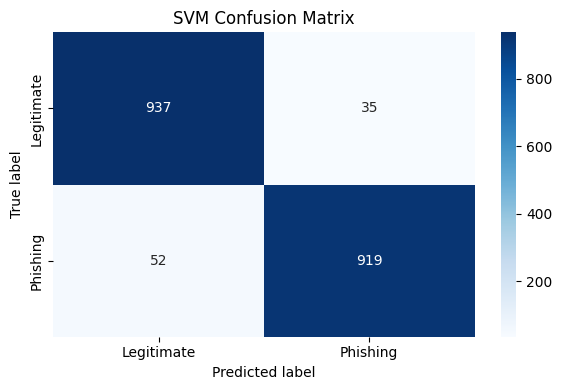

In [ ]:
# Membangun model
svm_model = SVC(
    probability=True,
    random_state=42
)

# Melatih model
svm_model.fit(X_train_selected, y_train)

# Evaluasi pada validation set
y_val_pred_svm = svm_model.predict(X_val_selected)
svm_accuracy = accuracy_score(y_val, y_val_pred_svm)
svm_precision = precision_score(y_val, y_val_pred_svm)
svm_recall = recall_score(y_val, y_val_pred_svm)
svm_f1 = f1_score(y_val, y_val_pred_svm)
y_val_proba_svm = svm_model.predict_proba(X_val_selected)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_val_proba_svm)
svm_roc_auc = auc(fpr_svm, tpr_svm)

print("\nSVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"ROC AUC: {svm_roc_auc:.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_val, y_val_pred_svm, target_names=['Legitimate', 'Phishing']))
plt.figure(figsize=(6, 4))
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
print("SVM Confusion Matrix:")
sns.heatmap(cm_svm, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('SVM Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


HASIL EVALUASI SVM MODEL
Accuracy            : 0.9552
Precision           : 0.9633
Recall              : 0.9464
F1-Score            : 0.9548
Loss (1 - Accuracy) : 0.0448
ROC AUC             : 0.9887

--- SVM Classification Report ---
              precision    recall  f1-score   support

  Legitimate       0.95      0.96      0.96       972
    Phishing       0.96      0.95      0.95       971

    accuracy                           0.96      1943
   macro avg       0.96      0.96      0.96      1943
weighted avg       0.96      0.96      0.96      1943



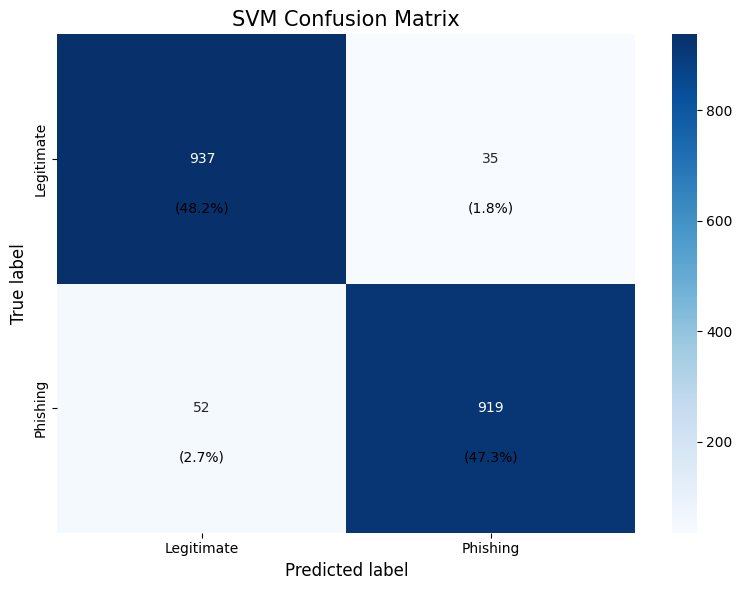

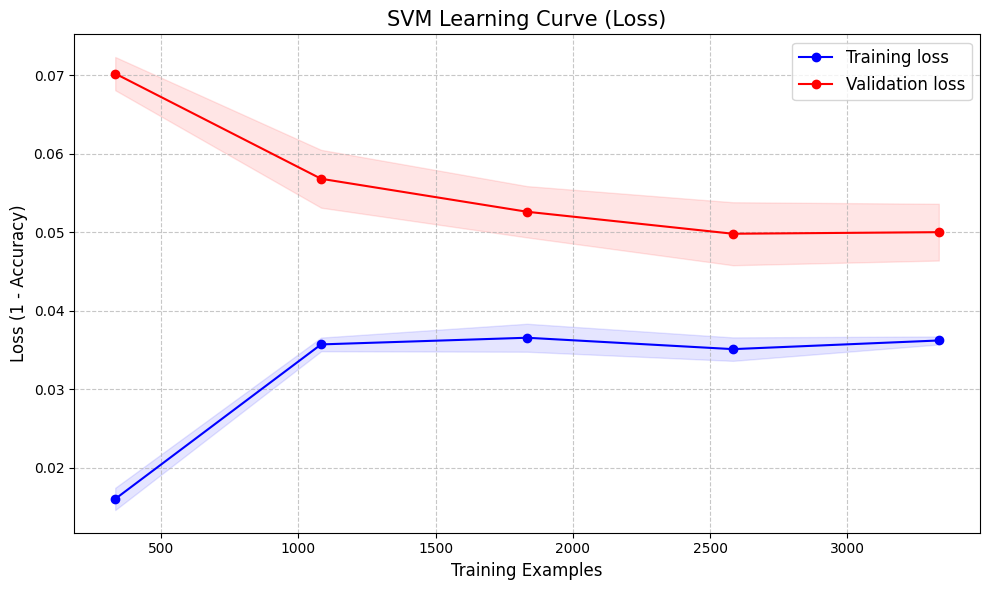


--- SVM Loss Analysis ---
Training Loss: 0.0362
Validation Loss: 0.0500
Gap Loss (|Training - Validation|): 0.0138
Interpretasi: Model cukup seimbang, dengan sedikit tanda overfitting yang masih dalam batas wajar


In [ ]:
print("\n" + "="*50)
print("HASIL EVALUASI SVM MODEL")
print("="*50)

# Tampilkan metrik dalam format tabel
svm_loss = 1 - svm_accuracy
metrics_svm = {
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1-Score': svm_f1,
    'Loss (1 - Accuracy)': svm_loss,
    'ROC AUC': svm_roc_auc
}

for metric, value in metrics_svm.items():
    print(f"{metric:<20}: {value:.4f}")

# Classification Report dalam format yang lebih rapi
print("\n--- SVM Classification Report ---")
cr_svm = classification_report(y_val, y_val_pred_svm, target_names=['Legitimate', 'Phishing'])
print(cr_svm)

# Visualisasi Confusion Matrix yang lebih baik
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])

# Tambahkan anotasi persentase di setiap sel confusion matrix
total = np.sum(cm_svm)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        plt.text(j+0.5, i+0.7, f'({cm_svm[i, j]/total:.1%})',
                 ha='center', va='center')

plt.title('SVM Confusion Matrix', fontsize=15)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Hitung learning curve untuk SVM
# Gunakan subset data jika SVM terlalu lambat
subset_size = min(5000, X_train_selected.shape[0])  # Batasi ke 5000 sampel jika data besar
indices = np.random.choice(X_train_selected.shape[0], subset_size, replace=False)
X_subset = X_train_selected[indices]
y_subset = y_train.iloc[indices] if hasattr(y_train, 'iloc') else y_train[indices]

train_sizes, train_scores, val_scores = learning_curve(
    svm_model, X_subset, y_subset,
    train_sizes=np.linspace(0.1, 1.0, 5),  # Kurangi jumlah titik untuk SVM
    cv=3, scoring='accuracy', n_jobs=-1  # Kurangi cv untuk kecepatan
)

# Calculate loss (1 - accuracy)
svm_train_loss = 1 - np.mean(train_scores, axis=1)
svm_val_loss = 1 - np.mean(val_scores, axis=1)

# Plot learning curve (loss)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, svm_train_loss, 'o-', color='blue', label='Training loss')
plt.plot(train_sizes, svm_val_loss, 'o-', color='red', label='Validation loss')
plt.fill_between(train_sizes,
                 svm_train_loss - np.std(1-train_scores, axis=1),
                 svm_train_loss + np.std(1-train_scores, axis=1),
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 svm_val_loss - np.std(1-val_scores, axis=1),
                 svm_val_loss + np.std(1-val_scores, axis=1),
                 alpha=0.1, color='red')
plt.title('SVM Learning Curve (Loss)', fontsize=15)
plt.xlabel('Training Examples', fontsize=12)
plt.ylabel('Loss (1 - Accuracy)', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('svm_learning_curve_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis loss
print("\n--- SVM Loss Analysis ---")
print(f"Training Loss: {svm_train_loss[-1]:.4f}")  # Loss pada full training set
print(f"Validation Loss: {svm_val_loss[-1]:.4f}")  # Loss pada validation set
gap = abs(svm_train_loss[-1] - svm_val_loss[-1])
print(f"Gap Loss (|Training - Validation|): {gap:.4f}")

# Interpretasi loss
if svm_train_loss[-1] < svm_val_loss[-1]:
    if gap > 0.05:
        interpretation = "Model cenderung overfitting (training loss lebih rendah dari validation loss secara signifikan)"
    else:
        interpretation = "Model cukup seimbang, dengan sedikit tanda overfitting yang masih dalam batas wajar"
elif svm_train_loss[-1] > svm_val_loss[-1]:
    interpretation = "Situasi tidak umum - validation loss lebih rendah dari training loss"
else:
    interpretation = "Model sangat seimbang (training loss = validation loss)"

print(f"Interpretasi: {interpretation}")


Logistic Regression Metrics:
Accuracy: 0.9223
Precision: 0.9298
Recall: 0.9135
F1-Score: 0.9216
ROC AUC: 0.9718

Logistic Regression Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.92      0.93      0.92       972
    Phishing       0.93      0.91      0.92       971

    accuracy                           0.92      1943
   macro avg       0.92      0.92      0.92      1943
weighted avg       0.92      0.92      0.92      1943

Logistic Regression Confusion Matrix:


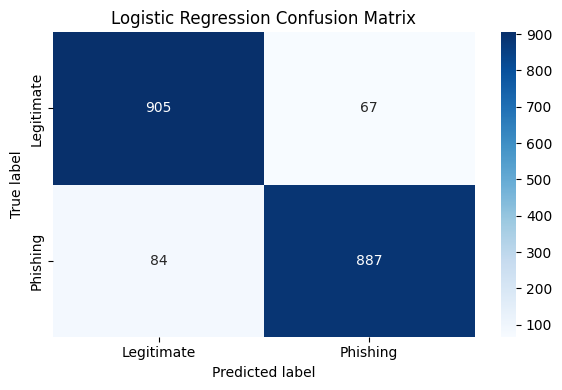

In [ ]:
lr_model = LogisticRegression(
    random_state=42
)

# Melatih model
lr_model.fit(X_train_selected, y_train)

# Evaluasi pada validation set
y_val_pred_lr = lr_model.predict(X_val_selected)
lr_accuracy = accuracy_score(y_val, y_val_pred_lr)
lr_precision = precision_score(y_val, y_val_pred_lr)
lr_recall = recall_score(y_val, y_val_pred_lr)
lr_f1 = f1_score(y_val, y_val_pred_lr)
y_val_proba_lr = lr_model.predict_proba(X_val_selected)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_val_proba_lr)
lr_roc_auc = auc(fpr_lr, tpr_lr)

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"ROC AUC: {lr_roc_auc:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_val, y_val_pred_lr, target_names=['Legitimate', 'Phishing']))

plt.figure(figsize=(6, 4))
cm_lr = confusion_matrix(y_val, y_val_pred_lr)
print("Logistic Regression Confusion Matrix:")
sns.heatmap(cm_lr, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


HASIL EVALUASI LOGISTIC REGRESSION MODEL
Accuracy            : 0.9223
Precision           : 0.9298
Recall              : 0.9135
F1-Score            : 0.9216
Loss (1 - Accuracy) : 0.0777
ROC AUC             : 0.9718

--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

  Legitimate       0.92      0.93      0.92       972
    Phishing       0.93      0.91      0.92       971

    accuracy                           0.92      1943
   macro avg       0.92      0.92      0.92      1943
weighted avg       0.92      0.92      0.92      1943



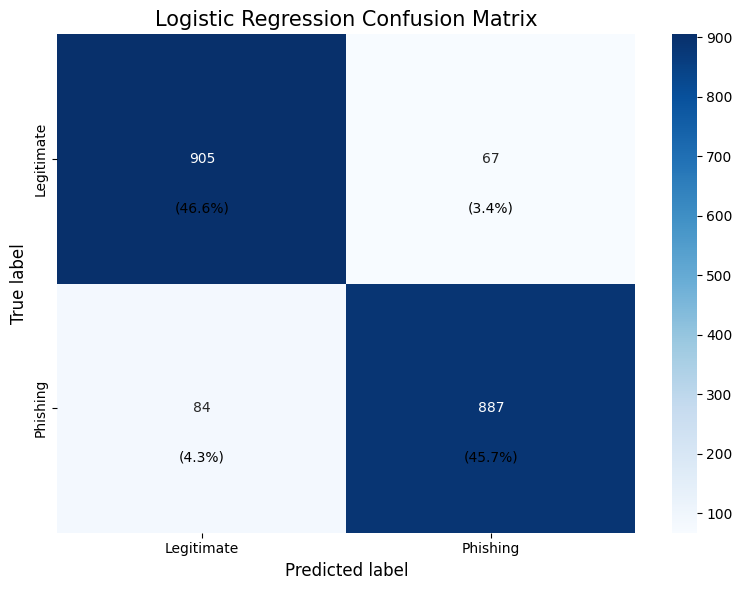

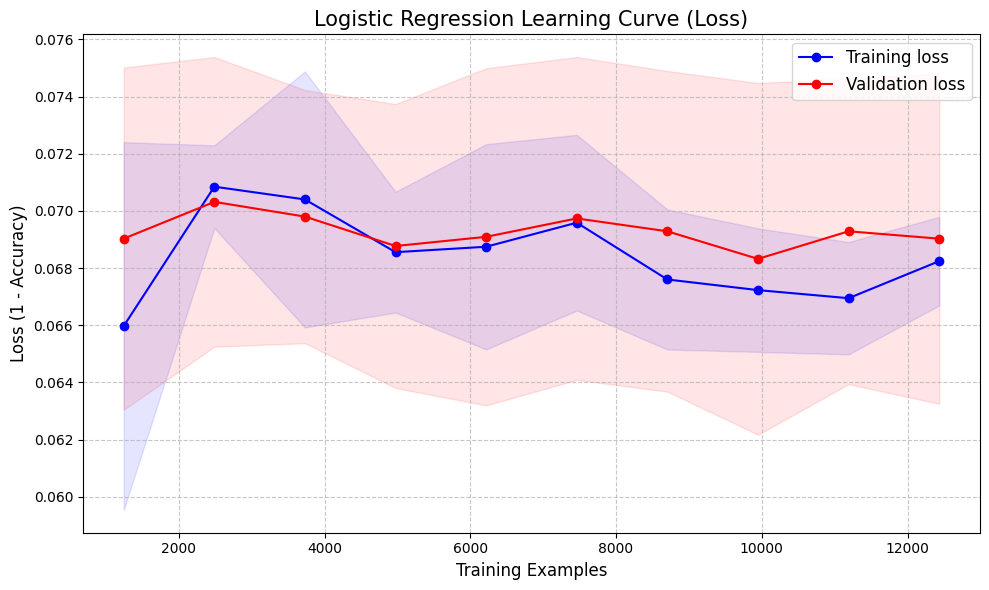


--- Logistic Regression Loss Analysis ---
Training Loss: 0.0682
Validation Loss: 0.0690
Gap Loss (|Training - Validation|): 0.0008
Interpretasi: Model cukup seimbang, dengan sedikit tanda overfitting yang masih dalam batas wajar


In [ ]:
print("\n" + "="*50)
print("HASIL EVALUASI LOGISTIC REGRESSION MODEL")
print("="*50)

# Tampilkan metrik dalam format tabel
lr_loss = 1 - lr_accuracy
metrics_lr = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1,
    'Loss (1 - Accuracy)': lr_loss,
    'ROC AUC': lr_roc_auc
}

for metric, value in metrics_lr.items():
    print(f"{metric:<20}: {value:.4f}")

# Classification Report dalam format yang lebih rapi
print("\n--- Logistic Regression Classification Report ---")
cr_lr = classification_report(y_val, y_val_pred_lr, target_names=['Legitimate', 'Phishing'])
print(cr_lr)

# Visualisasi Confusion Matrix yang lebih baik
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_val, y_val_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])

# Tambahkan anotasi persentase di setiap sel confusion matrix
total = np.sum(cm_lr)
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        plt.text(j+0.5, i+0.7, f'({cm_lr[i, j]/total:.1%})',
                 ha='center', va='center')

plt.title('Logistic Regression Confusion Matrix', fontsize=15)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.tight_layout()
plt.savefig('lr_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Hitung learning curve untuk Logistic Regression
train_sizes, train_scores, val_scores = learning_curve(
    lr_model, X_train_selected, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate loss (1 - accuracy)
lr_train_loss = 1 - np.mean(train_scores, axis=1)
lr_val_loss = 1 - np.mean(val_scores, axis=1)

# Plot learning curve (loss)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, lr_train_loss, 'o-', color='blue', label='Training loss')
plt.plot(train_sizes, lr_val_loss, 'o-', color='red', label='Validation loss')
plt.fill_between(train_sizes,
                 lr_train_loss - np.std(1-train_scores, axis=1),
                 lr_train_loss + np.std(1-train_scores, axis=1),
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 lr_val_loss - np.std(1-val_scores, axis=1),
                 lr_val_loss + np.std(1-val_scores, axis=1),
                 alpha=0.1, color='red')
plt.title('Logistic Regression Learning Curve (Loss)', fontsize=15)
plt.xlabel('Training Examples', fontsize=12)
plt.ylabel('Loss (1 - Accuracy)', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('lr_learning_curve_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis loss
print("\n--- Logistic Regression Loss Analysis ---")
print(f"Training Loss: {lr_train_loss[-1]:.4f}")  # Loss pada full training set
print(f"Validation Loss: {lr_val_loss[-1]:.4f}")  # Loss pada validation set
gap = abs(lr_train_loss[-1] - lr_val_loss[-1])
print(f"Gap Loss (|Training - Validation|): {gap:.4f}")

# Interpretasi loss
if lr_train_loss[-1] < lr_val_loss[-1]:
    if gap > 0.05:
        interpretation = "Model cenderung overfitting (training loss lebih rendah dari validation loss secara signifikan)"
    else:
        interpretation = "Model cukup seimbang, dengan sedikit tanda overfitting yang masih dalam batas wajar"
elif lr_train_loss[-1] > lr_val_loss[-1]:
    interpretation = "Situasi tidak umum - validation loss lebih rendah dari training loss"
else:
    interpretation = "Model sangat seimbang (training loss = validation loss)"

print(f"Interpretasi: {interpretation}")

In [ ]:
# Combine train and validation sets for final training
X_train_val = np.vstack((X_train_selected, X_val_selected))
y_train_val = np.hstack((y_train, y_val))

In [ ]:
print("\n-- Random Forest --")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Create GridSearchCV object with accuracy scoring
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,  # 5-fold cross-validation on training data
    scoring='accuracy',  # Use accuracy instead of f1
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
rf_grid.fit(X_train_selected, y_train)

# Get the best model and parameters
rf_best_model = rf_grid.best_estimator_
rf_best_params = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

print(f"Best parameters for Random Forest: {rf_best_params}")
print(f"Best cross-validation accuracy score: {rf_best_score:.4f}")

# Train final Random Forest model
print("\nTraining final Random Forest model...")
final_rf = RandomForestClassifier(**rf_best_params, random_state=42)
final_rf.fit(X_train_val, y_train_val)

# Evaluate Random Forest on test set
rf_pred = final_rf.predict(X_test_selected)
rf_pred_proba = final_rf.predict_proba(X_test_selected)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)

rf_cm = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest Performance Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")


-- Random Forest --
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy score: 0.9806

Training final Random Forest model...

Random Forest Performance Metrics:
Accuracy: 0.9923
Precision: 0.9908
Recall: 0.9938
F1 Score: 0.9923
ROC AUC: 0.9994



Menghitung learning curve untuk Random Forest...

HASIL EVALUASI RANDOM FOREST MODEL


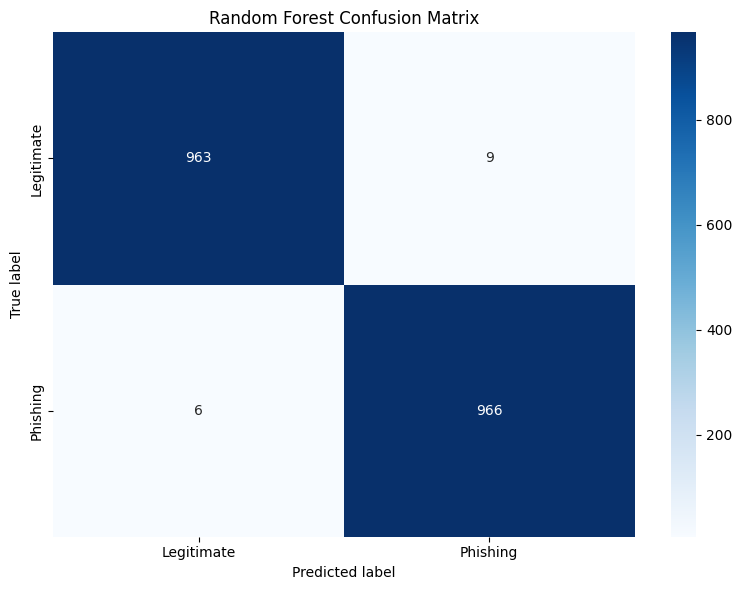

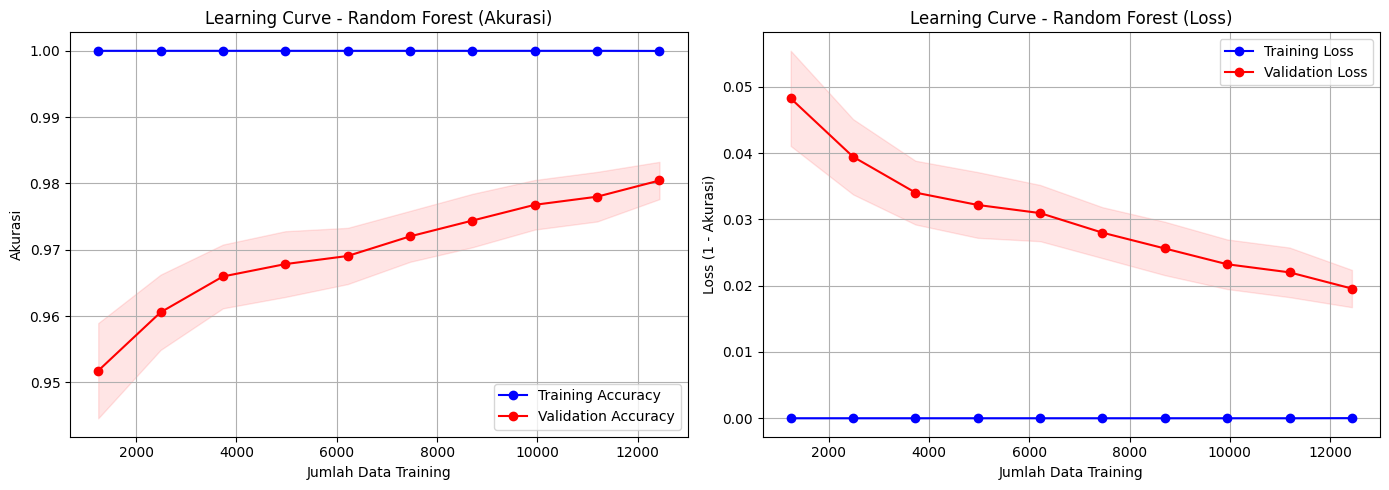


Analisis Loss Random Forest:
Training Loss (full dataset): 0.0000
Validation Loss (full dataset): 0.0196
Gap antara Training dan Validation Loss: 0.0195
Indikasi: Model cukup seimbang antara training dan validation loss


In [ ]:
# Menghitung learning curve untuk Random Forest
print("\nMenghitung learning curve untuk Random Forest...")
rf_train_sizes = np.linspace(.1, 1.0, 10)
rf_train_sizes, rf_train_scores, rf_valid_scores = learning_curve(
    RandomForestClassifier(**rf_best_params, random_state=42),
    X_train_selected, y_train, cv=5, n_jobs=-1,
    train_sizes=rf_train_sizes, scoring='accuracy'
)

# Menghitung mean dan standard deviation untuk Random Forest
rf_train_mean = np.mean(rf_train_scores, axis=1)
rf_train_std = np.std(rf_train_scores, axis=1)
rf_valid_mean = np.mean(rf_valid_scores, axis=1)
rf_valid_std = np.std(rf_valid_scores, axis=1)

# Menghitung loss untuk Random Forest
rf_train_loss = 1 - rf_train_mean
rf_valid_loss = 1 - rf_valid_mean

# Menyimpan metrics ke dalam dictionary
rf_metrics = {
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1': rf_f1,
    'roc_auc': rf_roc_auc,
    'fpr': rf_fpr,
    'tpr': rf_tpr,
    'cm': rf_cm,
    'train_sizes': rf_train_sizes,
    'train_mean': rf_train_mean,
    'train_std': rf_train_std,
    'valid_mean': rf_valid_mean,
    'valid_std': rf_valid_std,
    'train_loss': rf_train_loss,
    'valid_loss': rf_valid_loss
}

# Menampilkan hasil Random Forest
print("\n" + "="*50)
print("HASIL EVALUASI RANDOM FOREST MODEL")
print("="*50)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis Loss (Learning Curve)
plt.figure(figsize=(14, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(rf_metrics['train_sizes'], rf_metrics['train_mean'], 'o-', color='blue', label='Training Accuracy')
plt.plot(rf_metrics['train_sizes'], rf_metrics['valid_mean'], 'o-', color='red', label='Validation Accuracy')
plt.fill_between(rf_metrics['train_sizes'],
                 rf_metrics['train_mean'] - rf_metrics['train_std'],
                 rf_metrics['train_mean'] + rf_metrics['train_std'],
                 alpha=0.1, color='blue')
plt.fill_between(rf_metrics['train_sizes'],
                 rf_metrics['valid_mean'] - rf_metrics['valid_std'],
                 rf_metrics['valid_mean'] + rf_metrics['valid_std'],
                 alpha=0.1, color='red')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Akurasi')
plt.title('Learning Curve - Random Forest (Akurasi)')
plt.grid(True)
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(rf_metrics['train_sizes'], rf_metrics['train_loss'], 'o-', color='blue', label='Training Loss')
plt.plot(rf_metrics['train_sizes'], rf_metrics['valid_loss'], 'o-', color='red', label='Validation Loss')
plt.fill_between(rf_metrics['train_sizes'],
                 rf_metrics['train_loss'] - rf_metrics['train_std'],
                 rf_metrics['train_loss'] + rf_metrics['train_std'],
                 alpha=0.1, color='blue')
plt.fill_between(rf_metrics['train_sizes'],
                 rf_metrics['valid_loss'] - rf_metrics['valid_std'],
                 rf_metrics['valid_loss'] + rf_metrics['valid_std'],
                 alpha=0.1, color='red')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Loss (1 - Akurasi)')
plt.title('Learning Curve - Random Forest (Loss)')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('rf_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis Loss Detail
print("\nAnalisis Loss Random Forest:")
print(f"Training Loss (full dataset): {rf_metrics['train_loss'][-1]:.4f}")
print(f"Validation Loss (full dataset): {rf_metrics['valid_loss'][-1]:.4f}")
gap = abs(rf_metrics['train_loss'][-1] - rf_metrics['valid_loss'][-1])
print(f"Gap antara Training dan Validation Loss: {gap:.4f}")

if rf_metrics['train_loss'][-1] < rf_metrics['valid_loss'][-1]:
    if gap > 0.05:
        print("Indikasi: Terdapat sedikit overfitting karena validation loss lebih tinggi dari training loss")
    else:
        print("Indikasi: Model cukup seimbang antara training dan validation loss")
else:
    print("Indikasi: Tidak ada tanda overfitting, validation loss lebih rendah dari training loss")

In [ ]:
print("\n-- SVM --")
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'probability': [True]
}
# Create GridSearchCV object with accuracy scoring
svm_grid = GridSearchCV(
    SVC(random_state=42),
    svm_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to the data
svm_grid.fit(X_train_selected, y_train)

# Get the best model and parameters
svm_best_model = svm_grid.best_estimator_
svm_best_params = svm_grid.best_params_
svm_best_score = svm_grid.best_score_

print(f"Best parameters for SVM: {svm_best_params}")
print(f"Best cross-validation accuracy score: {svm_best_score:.4f}")

# Train final SVM model
print("\nTraining final SVM model...")
final_svm = SVC(**svm_best_params, random_state=42)
final_svm.fit(X_train_val, y_train_val)

# Evaluate SVM on test set
svm_pred = final_svm.predict(X_test_selected)
svm_pred_proba = final_svm.predict_proba(X_test_selected)[:, 1]

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred_proba)
svm_roc_auc = auc(svm_fpr, svm_tpr)

svm_cm = confusion_matrix(y_test, svm_pred)

print("\nSVM Performance Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print(f"ROC AUC: {svm_roc_auc:.4f}")


-- SVM --
Best parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Best cross-validation accuracy score: 0.9744

Training final SVM model...

SVM Performance Metrics:
Accuracy: 0.9856
Precision: 0.9856
Recall: 0.9856
F1 Score: 0.9856
ROC AUC: 0.9972



Menghitung learning curve untuk SVM...

HASIL EVALUASI SVM MODEL


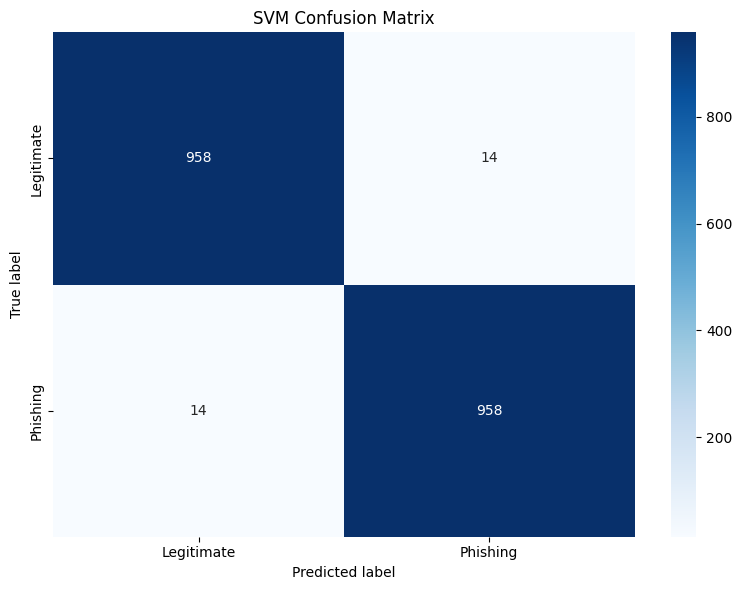

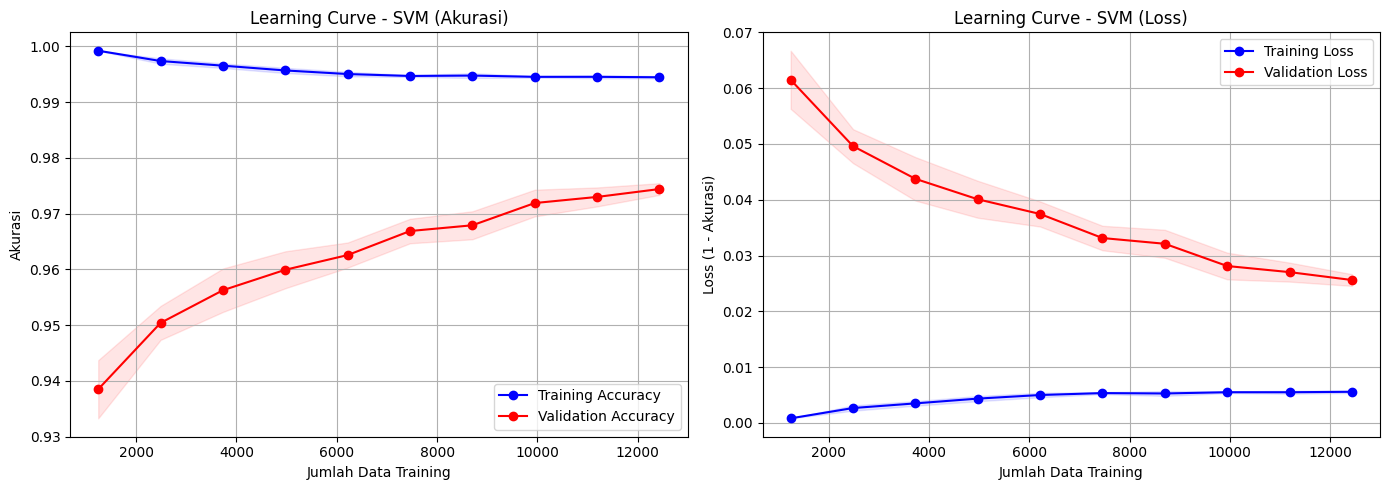


Analisis Loss SVM:
Training Loss (full dataset): 0.0056
Validation Loss (full dataset): 0.0256
Gap antara Training dan Validation Loss: 0.0200
Indikasi: Model cukup seimbang antara training dan validation loss


In [ ]:
# Menghitung learning curve untuk SVM
print("\nMenghitung learning curve untuk SVM...")
svm_train_sizes = np.linspace(.1, 1.0, 10)
svm_train_sizes, svm_train_scores, svm_valid_scores = learning_curve(
    SVC(**svm_best_params, random_state=42),
    X_train_selected, y_train, cv=5, n_jobs=-1,
    train_sizes=svm_train_sizes, scoring='accuracy'
)

# Menghitung mean dan standard deviation untuk SVM
svm_train_mean = np.mean(svm_train_scores, axis=1)
svm_train_std = np.std(svm_train_scores, axis=1)
svm_valid_mean = np.mean(svm_valid_scores, axis=1)
svm_valid_std = np.std(svm_valid_scores, axis=1)

# Menghitung loss untuk SVM
svm_train_loss = 1 - svm_train_mean
svm_valid_loss = 1 - svm_valid_mean

# Menyimpan metrics ke dalam dictionary
svm_metrics = {
    'accuracy': svm_accuracy,
    'precision': svm_precision,
    'recall': svm_recall,
    'f1': svm_f1,
    'roc_auc': svm_roc_auc,
    'fpr': svm_fpr,
    'tpr': svm_tpr,
    'cm': svm_cm,
    'train_sizes': svm_train_sizes,
    'train_mean': svm_train_mean,
    'train_std': svm_train_std,
    'valid_mean': svm_valid_mean,
    'valid_std': svm_valid_std,
    'train_loss': svm_train_loss,
    'valid_loss': svm_valid_loss
}

# Menampilkan hasil SVM
print("\n" + "="*50)
print("HASIL EVALUASI SVM MODEL")
print("="*50)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('SVM Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis Loss (Learning Curve)
plt.figure(figsize=(14, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(svm_metrics['train_sizes'], svm_metrics['train_mean'], 'o-', color='blue', label='Training Accuracy')
plt.plot(svm_metrics['train_sizes'], svm_metrics['valid_mean'], 'o-', color='red', label='Validation Accuracy')
plt.fill_between(svm_metrics['train_sizes'],
                 svm_metrics['train_mean'] - svm_metrics['train_std'],
                 svm_metrics['train_mean'] + svm_metrics['train_std'],
                 alpha=0.1, color='blue')
plt.fill_between(svm_metrics['train_sizes'],
                 svm_metrics['valid_mean'] - svm_metrics['valid_std'],
                 svm_metrics['valid_mean'] + svm_metrics['valid_std'],
                 alpha=0.1, color='red')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Akurasi')
plt.title('Learning Curve - SVM (Akurasi)')
plt.grid(True)
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(svm_metrics['train_sizes'], svm_metrics['train_loss'], 'o-', color='blue', label='Training Loss')
plt.plot(svm_metrics['train_sizes'], svm_metrics['valid_loss'], 'o-', color='red', label='Validation Loss')
plt.fill_between(svm_metrics['train_sizes'],
                 svm_metrics['train_loss'] - svm_metrics['train_std'],
                 svm_metrics['train_loss'] + svm_metrics['train_std'],
                 alpha=0.1, color='blue')
plt.fill_between(svm_metrics['train_sizes'],
                 svm_metrics['valid_loss'] - svm_metrics['valid_std'],
                 svm_metrics['valid_loss'] + svm_metrics['valid_std'],
                 alpha=0.1, color='red')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Loss (1 - Akurasi)')
plt.title('Learning Curve - SVM (Loss)')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('svm_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis Loss Detail
print("\nAnalisis Loss SVM:")
print(f"Training Loss (full dataset): {svm_metrics['train_loss'][-1]:.4f}")
print(f"Validation Loss (full dataset): {svm_metrics['valid_loss'][-1]:.4f}")
gap = abs(svm_metrics['train_loss'][-1] - svm_metrics['valid_loss'][-1])
print(f"Gap antara Training dan Validation Loss: {gap:.4f}")

if svm_metrics['train_loss'][-1] < svm_metrics['valid_loss'][-1]:
    if gap > 0.05:
        print("Indikasi: Terdapat sedikit overfitting karena validation loss lebih tinggi dari training loss")
    else:
        print("Indikasi: Model cukup seimbang antara training dan validation loss")
else:
    print("Indikasi: Tidak ada tanda overfitting, validation loss lebih rendah dari training loss")

In [ ]:
print("\n-- Logistic Regression --")
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Create GridSearchCV object with accuracy scoring
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to the data
lr_grid.fit(X_train_selected, y_train)

# Get the best model and parameters
lr_best_model = lr_grid.best_estimator_
lr_best_params = lr_grid.best_params_
lr_best_score = lr_grid.best_score_

print(f"Best parameters for Logistic Regression: {lr_best_params}")
print(f"Best cross-validation accuracy score: {lr_best_score:.4f}")

# Train final Logistic Regression model
print("\nTraining final Logistic Regression model...")
final_lr = LogisticRegression(**lr_best_params, random_state=42)
final_lr.fit(X_train_val, y_train_val)

# Evaluate Logistic Regression on test set
lr_pred = final_lr.predict(X_test_selected)
lr_pred_proba = final_lr.predict_proba(X_test_selected)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
lr_roc_auc = auc(lr_fpr, lr_tpr)

lr_cm = confusion_matrix(y_test, lr_pred)

print("\nLogistic Regression Performance Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"ROC AUC: {lr_roc_auc:.4f}")


-- Logistic Regression --
Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy score: 0.9313

Training final Logistic Regression model...

Logistic Regression Performance Metrics:
Accuracy: 0.9290
Precision: 0.9299
Recall: 0.9280
F1 Score: 0.9289
ROC AUC: 0.9766



Menghitung learning curve untuk Logistic Regression...

HASIL EVALUASI LOGISTIC REGRESSION MODEL


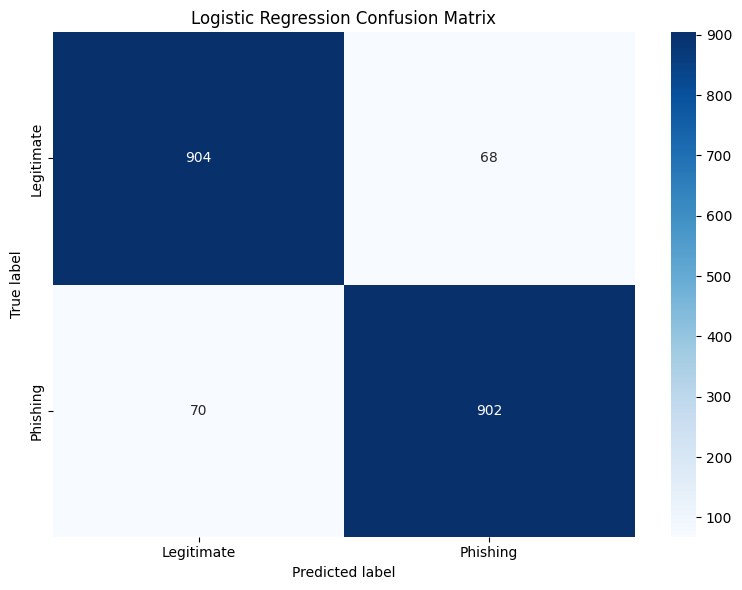

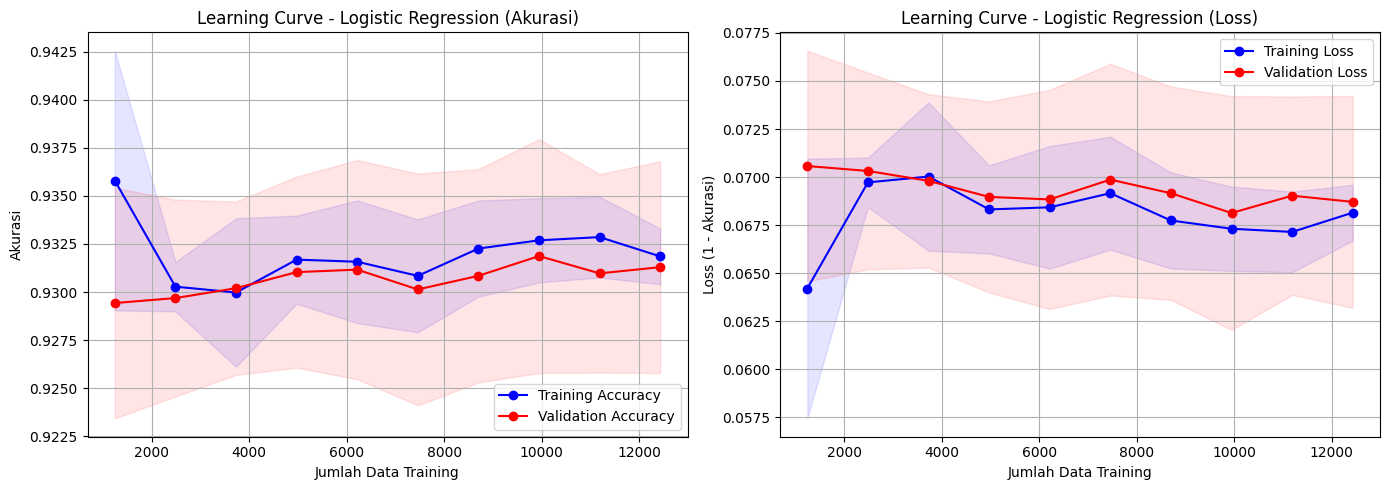


Analisis Loss Logistic Regression:
Training Loss (full dataset): 0.0681
Validation Loss (full dataset): 0.0687
Gap antara Training dan Validation Loss: 0.0006
Indikasi: Model cukup seimbang antara training dan validation loss


In [ ]:
# Menghitung learning curve untuk Logistic Regression
print("\nMenghitung learning curve untuk Logistic Regression...")
lr_train_sizes = np.linspace(.1, 1.0, 10)
lr_train_sizes, lr_train_scores, lr_valid_scores = learning_curve(
    LogisticRegression(**lr_best_params, random_state=42),
    X_train_selected, y_train, cv=5, n_jobs=-1,
    train_sizes=lr_train_sizes, scoring='accuracy'
)

# Menghitung mean dan standard deviation untuk Logistic Regression
lr_train_mean = np.mean(lr_train_scores, axis=1)
lr_train_std = np.std(lr_train_scores, axis=1)
lr_valid_mean = np.mean(lr_valid_scores, axis=1)
lr_valid_std = np.std(lr_valid_scores, axis=1)

# Menghitung loss untuk Logistic Regression
lr_train_loss = 1 - lr_train_mean
lr_valid_loss = 1 - lr_valid_mean

# Menyimpan metrics ke dalam dictionary
lr_metrics = {
    'accuracy': lr_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1': lr_f1,
    'roc_auc': lr_roc_auc,
    'fpr': lr_fpr,
    'tpr': lr_tpr,
    'cm': lr_cm,
    'train_sizes': lr_train_sizes,
    'train_mean': lr_train_mean,
    'train_std': lr_train_std,
    'valid_mean': lr_valid_mean,
    'valid_std': lr_valid_std,
    'train_loss': lr_train_loss,
    'valid_loss': lr_valid_loss
}

# Menampilkan hasil Logistic Regression
print("\n" + "="*50)
print("HASIL EVALUASI LOGISTIC REGRESSION MODEL")
print("="*50)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('lr_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis Loss (Learning Curve)
plt.figure(figsize=(14, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(lr_metrics['train_sizes'], lr_metrics['train_mean'], 'o-', color='blue', label='Training Accuracy')
plt.plot(lr_metrics['train_sizes'], lr_metrics['valid_mean'], 'o-', color='red', label='Validation Accuracy')
plt.fill_between(lr_metrics['train_sizes'],
                 lr_metrics['train_mean'] - lr_metrics['train_std'],
                 lr_metrics['train_mean'] + lr_metrics['train_std'],
                 alpha=0.1, color='blue')
plt.fill_between(lr_metrics['train_sizes'],
                 lr_metrics['valid_mean'] - lr_metrics['valid_std'],
                 lr_metrics['valid_mean'] + lr_metrics['valid_std'],
                 alpha=0.1, color='red')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Akurasi')
plt.title('Learning Curve - Logistic Regression (Akurasi)')
plt.grid(True)
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(lr_metrics['train_sizes'], lr_metrics['train_loss'], 'o-', color='blue', label='Training Loss')
plt.plot(lr_metrics['train_sizes'], lr_metrics['valid_loss'], 'o-', color='red', label='Validation Loss')
plt.fill_between(lr_metrics['train_sizes'],
                 lr_metrics['train_loss'] - lr_metrics['train_std'],
                 lr_metrics['train_loss'] + lr_metrics['train_std'],
                 alpha=0.1, color='blue')
plt.fill_between(lr_metrics['train_sizes'],
                 lr_metrics['valid_loss'] - lr_metrics['valid_std'],
                 lr_metrics['valid_loss'] + lr_metrics['valid_std'],
                 alpha=0.1, color='red')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Loss (1 - Akurasi)')
plt.title('Learning Curve - Logistic Regression (Loss)')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('lr_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Analisis Loss Detail
print("\nAnalisis Loss Logistic Regression:")
print(f"Training Loss (full dataset): {lr_metrics['train_loss'][-1]:.4f}")
print(f"Validation Loss (full dataset): {lr_metrics['valid_loss'][-1]:.4f}")
gap = abs(lr_metrics['train_loss'][-1] - lr_metrics['valid_loss'][-1])
print(f"Gap antara Training dan Validation Loss: {gap:.4f}")

if lr_metrics['train_loss'][-1] < lr_metrics['valid_loss'][-1]:
    if gap > 0.05:
        print("Indikasi: Terdapat sedikit overfitting karena validation loss lebih tinggi dari training loss")
    else:
        print("Indikasi: Model cukup seimbang antara training dan validation loss")
else:
    print("Indikasi: Tidak ada tanda overfitting, validation loss lebih rendah dari training loss")

In [ ]:
print("\n--- Final Model Training with Best Hyperparameters ---")



--- Final Model Training with Best Hyperparameters ---


In [ ]:
# Combine train and validation sets for final training
X_train_val = np.vstack((X_train_selected, X_val_selected))
y_train_val = np.hstack((y_train, y_val))

# Train final models with best hyperparameters
print("Training final Random Forest model...")
final_rf = RandomForestClassifier(**rf_best_params, random_state=42)
final_rf.fit(X_train_val, y_train_val)

print("Training final SVM model...")
final_svm = SVC(**svm_best_params, random_state=42)
final_svm.fit(X_train_val, y_train_val)

print("Training final Logistic Regression model...")
final_lr = LogisticRegression(**lr_best_params, random_state=42)
final_lr.fit(X_train_val, y_train_val)



Training final Random Forest model...
Training final SVM model...
Training final Logistic Regression model...


LogisticRegression(C=100, random_state=42)

In [ ]:
# rf_pred = final_rf.predict(X_test_selected)
# rf_pred_proba = final_rf.predict_proba(X_test_selected)[:, 1]

# rf_accuracy = accuracy_score(y_test, rf_pred)
# rf_precision = precision_score(y_test, rf_pred)
# rf_recall = recall_score(y_test, rf_pred)
# rf_f1 = f1_score(y_test, rf_pred)

# rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_proba)
# rf_roc_auc = auc(rf_fpr, rf_tpr)

# rf_cm = confusion_matrix(y_test, rf_pred)

# print("\nRandom Forest Performance Metrics:")
# print(f"Accuracy: {rf_accuracy:.4f}")
# print(f"Precision: {rf_precision:.4f}")
# print(f"Recall: {rf_recall:.4f}")
# print(f"F1 Score: {rf_f1:.4f}")
# print(f"ROC AUC: {rf_roc_auc:.4f}")

# # Evaluate SVM
# svm_pred = final_svm.predict(X_test_selected)
# svm_pred_proba = final_svm.predict_proba(X_test_selected)[:, 1]

# svm_accuracy = accuracy_score(y_test, svm_pred)
# svm_precision = precision_score(y_test, svm_pred)
# svm_recall = recall_score(y_test, svm_pred)
# svm_f1 = f1_score(y_test, svm_pred)

# svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred_proba)
# svm_roc_auc = auc(svm_fpr, svm_tpr)

# svm_cm = confusion_matrix(y_test, svm_pred)

# print("\nSVM Performance Metrics:")
# print(f"Accuracy: {svm_accuracy:.4f}")
# print(f"Precision: {svm_precision:.4f}")
# print(f"Recall: {svm_recall:.4f}")
# print(f"F1 Score: {svm_f1:.4f}")
# print(f"ROC AUC: {svm_roc_auc:.4f}")

# # Evaluate Logistic Regression
# lr_pred = final_lr.predict(X_test_selected)
# lr_pred_proba = final_lr.predict_proba(X_test_selected)[:, 1]

# lr_accuracy = accuracy_score(y_test, lr_pred)
# lr_precision = precision_score(y_test, lr_pred)
# lr_recall = recall_score(y_test, lr_pred)
# lr_f1 = f1_score(y_test, lr_pred)

# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
# lr_roc_auc = auc(lr_fpr, lr_tpr)

# lr_cm = confusion_matrix(y_test, lr_pred)

# print("\nLogistic Regression Performance Metrics:")
# print(f"Accuracy: {lr_accuracy:.4f}")
# print(f"Precision: {lr_precision:.4f}")
# print(f"Recall: {lr_recall:.4f}")
# print(f"F1 Score: {lr_f1:.4f}")
# print(f"ROC AUC: {lr_roc_auc:.4f}")

# # Store metrics in dictionaries
# rf_metrics = {
#     'accuracy': rf_accuracy,
#     'precision': rf_precision,
#     'recall': rf_recall,
#     'f1': rf_f1,
#     'roc_auc': rf_roc_auc,
#     'fpr': rf_fpr,
#     'tpr': rf_tpr,
#     'cm': rf_cm,
#     'y_pred_proba': rf_pred_proba
# }

# svm_metrics = {
#     'accuracy': svm_accuracy,
#     'precision': svm_precision,
#     'recall': svm_recall,
#     'f1': svm_f1,
#     'roc_auc': svm_roc_auc,
#     'fpr': svm_fpr,
#     'tpr': svm_tpr,
#     'cm': svm_cm,
#     'y_pred_proba': svm_pred_proba
# }

# lr_metrics = {
#     'accuracy': lr_accuracy,
#     'precision': lr_precision,
#     'recall': lr_recall,
#     'f1': lr_f1,
#     'roc_auc': lr_roc_auc,
#     'fpr': lr_fpr,
#     'tpr': lr_tpr,
#     'cm': lr_cm,
#     'y_pred_proba': lr_pred_proba
# }


In [ ]:
print("\n--- Ensemble with Weighted Voting ---")



--- Ensemble with Weighted Voting ---


In [ ]:
# Menggunakan bobot berdasarkan akurasi
weights = {
    'rf': rf_metrics['accuracy'],
    'svm': svm_metrics['accuracy'],
    'lr': lr_metrics['accuracy']
}

# Opsional: Normalisasi bobot (bisa dikomentari jika tidak ingin normalisasi)
# total_weight = sum(weights.values())
# weights = {k: v / total_weight for k, v in weights.items()}

print("Model weights based on accuracy:")
for model_name, weight in weights.items():
    print(f"{model_name}: {weight:.4f}")

# Implementasi VotingClassifier dengan bobot
ensemble_soft = VotingClassifier(
    estimators=[
        ('rf', final_rf),
        ('svm', final_svm),
        ('lr', final_lr)
    ],
    voting='soft',
    weights=[weights['rf'], weights['svm'], weights['lr']]
)

# Latih ensemble pada combined dataset
ensemble_soft.fit(X_train_val, y_train_val)

# Prediksi menggunakan ensemble
ensemble_pred = ensemble_soft.predict(X_test_selected)
ensemble_proba = ensemble_soft.predict_proba(X_test_selected)[:, 1]  # Ambil probabilitas untuk kelas positif

# Evaluate ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

# ROC curve for ensemble - gunakan ensemble_proba, bukan weighted_proba
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_proba)
ensemble_roc_auc = auc(ensemble_fpr, ensemble_tpr)

print("\nEnsemble (Voting Classifier) Performance Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC: {ensemble_roc_auc:.4f}")

# Confusion Matrix for ensemble
ensemble_cm = confusion_matrix(y_test, ensemble_pred)

# Classification Report
print("\nEnsemble Classification Report:")
print(classification_report(y_test, ensemble_pred, target_names=['Legitimate', 'Phishing']))

Model weights based on accuracy:
rf: 0.9923
svm: 0.9856
lr: 0.9290

Ensemble (Voting Classifier) Performance Metrics:
Accuracy: 0.9897
Precision: 0.9887
Recall: 0.9907
F1 Score: 0.9897
ROC AUC: 0.9987

Ensemble Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.99      0.99      0.99       972
    Phishing       0.99      0.99      0.99       972

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



In [ ]:
# Prediksi menggunakan ensemble
ensemble_pred = ensemble_soft.predict(X_test_selected)
ensemble_proba = ensemble_soft.predict_proba(X_test_selected)[:, 1]  # Ambil probabilitas untuk kelas positif

# Evaluate ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

# ROC curve for ensemble - gunakan ensemble_proba, bukan weighted_proba
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_proba)
ensemble_roc_auc = auc(ensemble_fpr, ensemble_tpr)

print("\nEnsemble (Voting Classifier) Performance Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC: {ensemble_roc_auc:.4f}")

# Confusion Matrix for ensemble
ensemble_cm = confusion_matrix(y_test, ensemble_pred)

# Classification Report
print("\nEnsemble Classification Report:")
print(classification_report(y_test, ensemble_pred, target_names=['Legitimate', 'Phishing']))


Ensemble (Voting Classifier) Performance Metrics:
Accuracy: 0.9897
Precision: 0.9887
Recall: 0.9907
F1 Score: 0.9897
ROC AUC: 0.9987

Ensemble Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.99      0.99      0.99       972
    Phishing       0.99      0.99      0.99       972

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



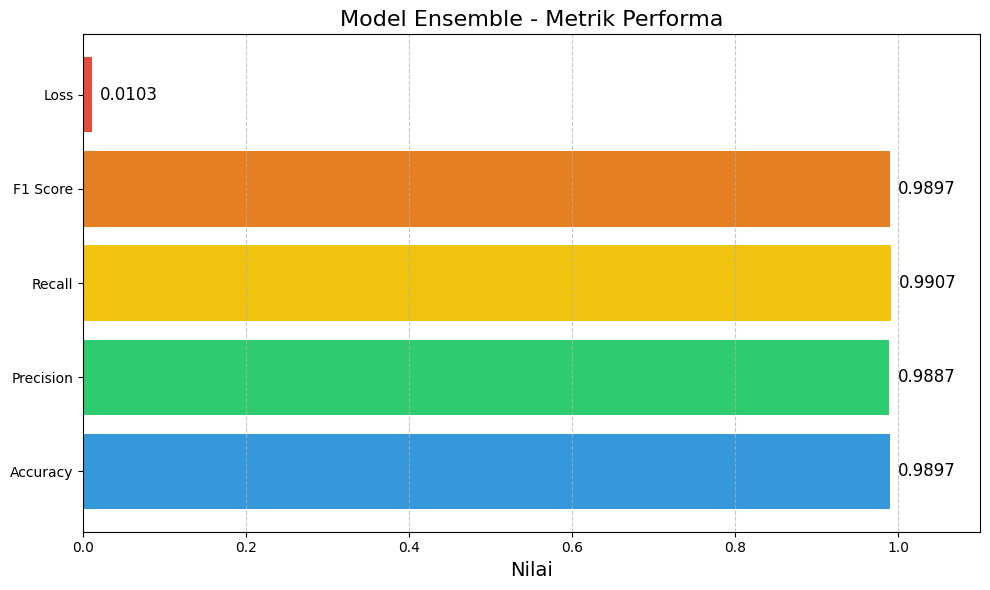

In [ ]:
# Visualisasi Metrik Model Ensemble
plt.figure(figsize=(10, 6))

# Data untuk metrik ensemble
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
metrics_values = [ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1, 1 - ensemble_accuracy]
colors = ['#3498db', '#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']

# Plot horizontal bar chart
bars = plt.barh(metrics_names, metrics_values, color=colors)

# Tambahkan nilai metrik di setiap bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, i, f'{width:.4f}',
             va='center', fontsize=12)

# Tambahkan judul dan label
plt.title('Model Ensemble - Metrik Performa', fontsize=16)
plt.xlabel('Nilai', fontsize=14)
plt.xlim(0, 1.1)  # Nilai metrik antara 0 dan 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('ensemble_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# # 1. Bobot Model
# print("\nModel weights based on accuracy:")
# for model_name, weight in weights.items():
#     print(f"{model_name}: {weight:.4f}")

# # 2. Metrik Performa
# print("\nEnsemble (Voting Classifier) Performance Metrics:")
# print(f"Accuracy: {ensemble_accuracy:.4f}")
# print(f"Precision: {ensemble_precision:.4f}")
# print(f"Recall: {ensemble_recall:.4f}")
# print(f"F1 Score: {ensemble_f1:.4f}")
# print(f"ROC AUC: {ensemble_roc_auc:.4f}")

# # 3. Classification Report
# print("\nEnsemble Classification Report (Final Model):")
# print(classification_report(y_test, ensemble_pred, target_names=['Legitimate', 'Phishing']))

# # 4. Confusion Matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Legitimate', 'Phishing'],
#             yticklabels=['Legitimate', 'Phishing'])
# plt.title('Ensemble Confusion Matrix')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.tight_layout()
# plt.show()

# # 5. Perbandingan Model Base vs Ensemble
# ensemble_improvement_rf = (ensemble_accuracy - rf_accuracy) / rf_accuracy * 100
# ensemble_improvement_svm = (ensemble_accuracy - svm_accuracy) / svm_accuracy * 100
# ensemble_improvement_lr = (ensemble_accuracy - lr_accuracy) / lr_accuracy * 100

# print("\nPerbandingan Ensemble vs Model Dasar:")
# print(f"Peningkatan dari Random Forest: {ensemble_improvement_rf:.2f}%")
# print(f"Peningkatan dari SVM: {ensemble_improvement_svm:.2f}%")
# print(f"Peningkatan dari Logistic Regression: {ensemble_improvement_lr:.2f}%")

# # 6. ROC Curves Comparison
# plt.figure(figsize=(10, 8))
# plt.plot(rf_metrics['fpr'], rf_metrics['tpr'],
#          label=f'Random Forest (AUC = {rf_metrics["roc_auc"]:.4f})')
# plt.plot(svm_metrics['fpr'], svm_metrics['tpr'],
#          label=f'SVM (AUC = {svm_metrics["roc_auc"]:.4f})')
# plt.plot(lr_metrics['fpr'], lr_metrics['tpr'],
#          label=f'Logistic Regression (AUC = {lr_metrics["roc_auc"]:.4f})')
# plt.plot(ensemble_fpr, ensemble_tpr,
#          label=f'Ensemble (AUC = {ensemble_roc_auc:.4f})', linestyle='--', linewidth=3)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves Comparison')
# plt.legend(loc='lower right')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [ ]:
# # Evaluate Random Forest
# rf_pred = final_rf.predict(X_test_selected)
# rf_pred_proba = final_rf.predict_proba(X_test_selected)[:, 1]

# rf_accuracy = accuracy_score(y_test, rf_pred)
# rf_precision = precision_score(y_test, rf_pred)
# rf_recall = recall_score(y_test, rf_pred)
# rf_f1 = f1_score(y_test, rf_pred)

# rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_proba)
# rf_roc_auc = auc(rf_fpr, rf_tpr)

# rf_cm = confusion_matrix(y_test, rf_pred)

# print("\nRandom Forest Performance Metrics:")
# print(f"Accuracy: {rf_accuracy:.4f}")
# print(f"Precision: {rf_precision:.4f}")
# print(f"Recall: {rf_recall:.4f}")
# print(f"F1 Score: {rf_f1:.4f}")
# print(f"ROC AUC: {rf_roc_auc:.4f}")

# # Evaluate SVM
# svm_pred = final_svm.predict(X_test_selected)
# svm_pred_proba = final_svm.predict_proba(X_test_selected)[:, 1]

# svm_accuracy = accuracy_score(y_test, svm_pred)
# svm_precision = precision_score(y_test, svm_pred)
# svm_recall = recall_score(y_test, svm_pred)
# svm_f1 = f1_score(y_test, svm_pred)

# svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred_proba)
# svm_roc_auc = auc(svm_fpr, svm_tpr)

# svm_cm = confusion_matrix(y_test, svm_pred)

# print("\nSVM Performance Metrics:")
# print(f"Accuracy: {svm_accuracy:.4f}")
# print(f"Precision: {svm_precision:.4f}")
# print(f"Recall: {svm_recall:.4f}")
# print(f"F1 Score: {svm_f1:.4f}")
# print(f"ROC AUC: {svm_roc_auc:.4f}")

# # Evaluate Logistic Regression
# lr_pred = final_lr.predict(X_test_selected)
# lr_pred_proba = final_lr.predict_proba(X_test_selected)[:, 1]

# lr_accuracy = accuracy_score(y_test, lr_pred)
# lr_precision = precision_score(y_test, lr_pred)
# lr_recall = recall_score(y_test, lr_pred)
# lr_f1 = f1_score(y_test, lr_pred)

# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
# lr_roc_auc = auc(lr_fpr, lr_tpr)

# lr_cm = confusion_matrix(y_test, lr_pred)

# print("\nLogistic Regression Performance Metrics:")
# print(f"Accuracy: {lr_accuracy:.4f}")
# print(f"Precision: {lr_precision:.4f}")
# print(f"Recall: {lr_recall:.4f}")
# print(f"F1 Score: {lr_f1:.4f}")
# print(f"ROC AUC: {lr_roc_auc:.4f}")

# # Classification report untuk final models
# print("\n--- Classification Reports for Final Models ---")

# print("\nRandom Forest Classification Report (Final Model):")
# print(classification_report(y_test, rf_pred, target_names=['Legitimate', 'Phishing']))

# print("\nSVM Classification Report (Final Model):")
# print(classification_report(y_test, svm_pred, target_names=['Legitimate', 'Phishing']))

# print("\nLogistic Regression Classification Report (Final Model):")
# print(classification_report(y_test, lr_pred, target_names=['Legitimate', 'Phishing']))

# print("\nEnsemble Classification Report (Final Model):")
# print(classification_report(y_test, ensemble_pred, target_names=['Legitimate', 'Phishing']))

In [ ]:
# print("\n--- Summary of Results ---")
# models = ['Random Forest', 'SVM', 'Logistic Regression', 'Ensemble (Weighted Voting)']
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# results = pd.DataFrame(index=models, columns=metrics)

# # Fill in the results
# results.loc['Random Forest'] = [
#     rf_metrics['accuracy'], rf_metrics['precision'],
#     rf_metrics['recall'], rf_metrics['f1'], rf_metrics['roc_auc']
# ]
# results.loc['SVM'] = [
#     svm_metrics['accuracy'], svm_metrics['precision'],
#     svm_metrics['recall'], svm_metrics['f1'], svm_metrics['roc_auc']
# ]
# results.loc['Logistic Regression'] = [
#     lr_metrics['accuracy'], lr_metrics['precision'],
#     lr_metrics['recall'], lr_metrics['f1'], lr_metrics['roc_auc']
# ]
# results.loc['Ensemble (Weighted Voting)'] = [
#     ensemble_accuracy, ensemble_precision,
#     ensemble_recall, ensemble_f1, ensemble_roc_auc
# ]

# print(results.round(4))

# # 14. Print data split information
# print("\n--- Data Split Summary ---")
# print(f"Total dataset size: {X.shape[0]} samples")
# print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]:.1%})")
# print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]:.1%})")
# print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]:.1%})")
# print(f"Combined train+validation for final models: {X_train_val.shape[0]} samples ({X_train_val.shape[0]/X.shape[0]:.1%})")

In [ ]:
# # Add these imports at the top with your other imports
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# import numpy as np

# # After your feature selection section, before the model training, add this:
# print("\n-- Training Performance Monitoring --")

# # For Random Forest - inline learning curve calculation
# print("\nCalculating Random Forest learning curves...")
# rf_train_sizes = np.linspace(.1, 1.0, 10)
# rf_train_sizes, rf_train_scores, rf_valid_scores = learning_curve(
#     RandomForestClassifier(**rf_best_params, random_state=42),
#     X_train_selected, y_train, cv=5, n_jobs=-1,
#     train_sizes=rf_train_sizes, scoring='accuracy'
# )
# # Calculate mean and std for Random Forest
# rf_train_mean = np.mean(rf_train_scores, axis=1)
# rf_train_std = np.std(rf_train_scores, axis=1)
# rf_valid_mean = np.mean(rf_valid_scores, axis=1)
# rf_valid_std = np.std(rf_valid_scores, axis=1)

# # For SVM - inline learning curve calculation
# print("Calculating SVM learning curves...")
# svm_train_sizes = np.linspace(.1, 1.0, 10)
# svm_train_sizes, svm_train_scores, svm_valid_scores = learning_curve(
#     SVC(**svm_best_params, random_state=42),
#     X_train_selected, y_train, cv=5, n_jobs=-1,
#     train_sizes=svm_train_sizes, scoring='accuracy'
# )
# # Calculate mean and std for SVM
# svm_train_mean = np.mean(svm_train_scores, axis=1)
# svm_train_std = np.std(svm_train_scores, axis=1)
# svm_valid_mean = np.mean(svm_valid_scores, axis=1)
# svm_valid_std = np.std(svm_valid_scores, axis=1)

# # For Logistic Regression - inline learning curve calculation
# print("Calculating Logistic Regression learning curves...")
# lr_train_sizes = np.linspace(.1, 1.0, 10)
# lr_train_sizes, lr_train_scores, lr_valid_scores = learning_curve(
#     LogisticRegression(**lr_best_params, random_state=42),
#     X_train_selected, y_train, cv=5, n_jobs=-1,
#     train_sizes=lr_train_sizes, scoring='accuracy'
# )
# # Calculate mean and std for Logistic Regression
# lr_train_mean = np.mean(lr_train_scores, axis=1)
# lr_train_std = np.std(lr_train_scores, axis=1)
# lr_valid_mean = np.mean(lr_valid_scores, axis=1)
# lr_valid_std = np.std(lr_valid_scores, axis=1)

# # Store training metrics in your existing dictionaries
# rf_metrics['train_sizes'] = rf_train_sizes
# rf_metrics['train_mean'] = rf_train_mean
# rf_metrics['train_std'] = rf_train_std
# rf_metrics['valid_mean'] = rf_valid_mean
# rf_metrics['valid_std'] = rf_valid_std
# rf_metrics['train_loss'] = 1 - rf_train_mean
# rf_metrics['valid_loss'] = 1 - rf_valid_mean

# svm_metrics['train_sizes'] = svm_train_sizes
# svm_metrics['train_mean'] = svm_train_mean
# svm_metrics['train_std'] = svm_train_std
# svm_metrics['valid_mean'] = svm_valid_mean
# svm_metrics['valid_std'] = svm_valid_std
# svm_metrics['train_loss'] = 1 - svm_train_mean
# svm_metrics['valid_loss'] = 1 - svm_valid_mean

# lr_metrics['train_sizes'] = lr_train_sizes
# lr_metrics['train_mean'] = lr_train_mean
# lr_metrics['train_std'] = lr_train_std
# lr_metrics['valid_mean'] = lr_valid_mean
# lr_metrics['valid_std'] = lr_valid_std
# lr_metrics['train_loss'] = 1 - lr_train_mean
# lr_metrics['valid_loss'] = 1 - lr_valid_mean

# # Then, modify your plotting section to include learning curves
# # Replace your plotting section with this expanded version:

# plt.figure(figsize=(25, 20))

# # 1. Plot confusion matrices (same as before)
# plt.subplot(3, 3, 1)
# sns.heatmap(rf_metrics['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Random Forest Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# plt.subplot(3, 3, 2)
# sns.heatmap(svm_metrics['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('SVM Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# plt.subplot(3, 3, 3)
# sns.heatmap(lr_metrics['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Logistic Regression Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# # 2. Plot ensemble confusion matrix
# plt.subplot(3, 3, 4)
# sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Ensemble Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# # 3. Plot ROC curves
# plt.subplot(3, 3, 5)
# plt.plot(rf_metrics['fpr'], rf_metrics['tpr'], label=f'Random Forest (AUC = {rf_metrics["roc_auc"]:.4f})')
# plt.plot(svm_metrics['fpr'], svm_metrics['tpr'], label=f'SVM (AUC = {svm_metrics["roc_auc"]:.4f})')
# plt.plot(lr_metrics['fpr'], lr_metrics['tpr'], label=f'Logistic Regression (AUC = {lr_metrics["roc_auc"]:.4f})')
# plt.plot(ensemble_fpr, ensemble_tpr, label=f'Ensemble (AUC = {ensemble_roc_auc:.4f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves')
# plt.legend(loc='lower right')


# # 5. Learning curves for accuracy
# plt.subplot(3, 3, 7)
# plt.plot(rf_metrics['train_sizes'], rf_metrics['train_mean'], 'o-', color='r', label='Random Forest (train)')
# plt.plot(rf_metrics['train_sizes'], rf_metrics['valid_mean'], 'o-', color='g', label='Random Forest (val)')
# plt.plot(svm_metrics['train_sizes'], svm_metrics['train_mean'], 'o-', color='b', label='SVM (train)')
# plt.plot(svm_metrics['train_sizes'], svm_metrics['valid_mean'], 'o-', color='c', label='SVM (val)')
# plt.plot(lr_metrics['train_sizes'], lr_metrics['train_mean'], 'o-', color='m', label='Logistic Regression (train)')
# plt.plot(lr_metrics['train_sizes'], lr_metrics['valid_mean'], 'o-', color='y', label='Logistic Regression (val)')
# plt.xlabel('Training Examples')
# plt.ylabel('Accuracy')
# plt.title('Learning Curves (Accuracy)')
# plt.legend(loc='lower right', fontsize='small')
# plt.grid(True)

# # 6. Learning curves for loss
# plt.subplot(3, 3, 8)
# plt.plot(rf_metrics['train_sizes'], rf_metrics['train_loss'], 'o-', color='r', label='Random Forest (train)')
# plt.plot(rf_metrics['train_sizes'], rf_metrics['valid_loss'], 'o-', color='g', label='Random Forest (val)')
# plt.plot(svm_metrics['train_sizes'], svm_metrics['train_loss'], 'o-', color='b', label='SVM (train)')
# plt.plot(svm_metrics['train_sizes'], svm_metrics['valid_loss'], 'o-', color='c', label='SVM (val)')
# plt.plot(lr_metrics['train_sizes'], lr_metrics['train_loss'], 'o-', color='m', label='Logistic Regression (train)')
# plt.plot(lr_metrics['train_sizes'], lr_metrics['valid_loss'], 'o-', color='y', label='Logistic Regression (val)')
# plt.xlabel('Training Examples')
# plt.ylabel('Loss (1 - Accuracy)')
# plt.title('Learning Curves (Loss)')
# plt.legend(loc='upper right', fontsize='small')
# plt.grid(True)

# # 7. Barplot comparing metrics across models
# plt.subplot(3, 3, 9)
# models = ['RF', 'SVM', 'LR', 'Ensemble']
# accuracy = [rf_metrics['accuracy'], svm_metrics['accuracy'], lr_metrics['accuracy'], ensemble_accuracy]
# f1_scores = [rf_metrics['f1'], svm_metrics['f1'], lr_metrics['f1'], ensemble_f1]
# precision = [rf_metrics['precision'], svm_metrics['precision'], lr_metrics['precision'], ensemble_precision]
# recall = [rf_metrics['recall'], svm_metrics['recall'], lr_metrics['recall'], ensemble_recall]

# x = np.arange(len(models))
# width = 0.2

# plt.bar(x - width*1.5, accuracy, width, label='Accuracy')
# plt.bar(x - width/2, precision, width, label='Precision')
# plt.bar(x + width/2, recall, width, label='Recall')
# plt.bar(x + width*1.5, f1_scores, width, label='F1')
# plt.xticks(x, models)
# plt.ylabel('Score')
# plt.title('Comparison of Metrics Across Models')
# plt.legend(loc='lower right', fontsize='small')

# plt.tight_layout()
# plt.savefig('phishing_detection_results.png', dpi=300)
# plt.show()  # Tambahkan baris ini untuk menampilkan grafik


# # Update the summary table to include training loss
# print("\n--- Extended Summary of Results ---")
# models = ['Random Forest', 'SVM', 'Logistic Regression', 'Ensemble (Weighted Voting)']
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Train Loss', 'Validation Loss']

# results = pd.DataFrame(index=models, columns=metrics)

# # Fill in the results
# results.loc['Random Forest'] = [
#     rf_metrics['accuracy'], rf_metrics['precision'],
#     rf_metrics['recall'], rf_metrics['f1'], rf_metrics['roc_auc'],
#     rf_metrics['train_loss'][-1], rf_metrics['valid_loss'][-1]  # Last values represent full training set
# ]
# results.loc['SVM'] = [
#     svm_metrics['accuracy'], svm_metrics['precision'],
#     svm_metrics['recall'], svm_metrics['f1'], svm_metrics['roc_auc'],
#     svm_metrics['train_loss'][-1], svm_metrics['valid_loss'][-1]
# ]
# results.loc['Logistic Regression'] = [
#     lr_metrics['accuracy'], lr_metrics['precision'],
#     lr_metrics['recall'], lr_metrics['f1'], lr_metrics['roc_auc'],
#     lr_metrics['train_loss'][-1], lr_metrics['valid_loss'][-1]
# ]
# results.loc['Ensemble (Weighted Voting)'] = [
#     ensemble_accuracy, ensemble_precision,
#     ensemble_recall, ensemble_f1, ensemble_roc_auc,
#     np.nan, np.nan  # No learning curves for ensemble
# ]

# print(results.round(4))

In [ ]:
# plt.figure(figsize=(15, 6))

# # Plot 1: Akurasi Random Forest
# plt.subplot(1, 2, 1)
# plt.plot(rf_metrics['train_sizes'], rf_metrics['train_mean'], 'o-', color='blue', label='Training Accuracy')
# plt.plot(rf_metrics['train_sizes'], rf_metrics['valid_mean'], 'o-', color='red', label='Validation Accuracy')
# plt.xlabel('Jumlah Data Training')
# plt.ylabel('Akurasi')
# plt.title('Learning Curve - Random Forest (Akurasi)')
# plt.grid(True)
# plt.legend(loc='lower right')

# # Plot 2: Loss Random Forest
# plt.subplot(1, 2, 2)
# plt.plot(rf_metrics['train_sizes'], rf_metrics['train_loss'], 'o-', color='blue', label='Training Loss')
# plt.plot(rf_metrics['train_sizes'], rf_metrics['valid_loss'], 'o-', color='red', label='Validation Loss')
# plt.xlabel('Jumlah Data Training')
# plt.ylabel('Loss (1 - Akurasi)')
# plt.title('Learning Curve - Random Forest (Loss)')
# plt.grid(True)
# plt.legend(loc='upper right')

# plt.tight_layout()
# plt.savefig('random_forest_performance.png', dpi=300)
# plt.show()  # Pastikan untuk menambahkan ini agar grafik ditampilkan di notebook


EVALUASI MODEL RANDOM FOREST PADA SELURUH DATASET

Metrik Performa Random Forest pada Seluruh Dataset:
Accuracy: 0.9992
Precision: 0.9991
Recall: 0.9994
F1 Score: 0.9992
ROC AUC: 1.0000

Classification Report - Seluruh Dataset:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      9716
    Phishing       1.00      1.00      1.00      9715

    accuracy                           1.00     19431
   macro avg       1.00      1.00      1.00     19431
weighted avg       1.00      1.00      1.00     19431



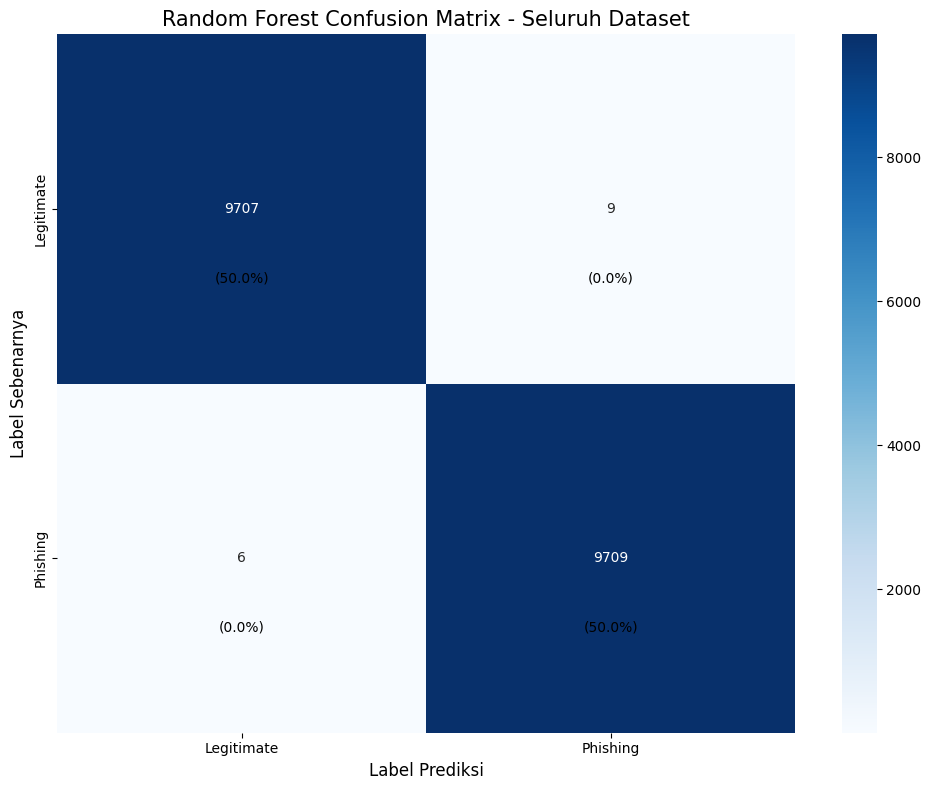


--- Hasil Klasifikasi Random Forest (50 Sampel) - Seluruh Dataset ---
                                             URL Asli Label Sebenarnya  \
0      http://www.progarchives.com/album.asp?id=61737         Phishing   
1   http://signin.eday.co.uk.ws.edayisapi.dllsign....         Phishing   
2   http://www.avevaconstruction.com/blesstool/ima...         Phishing   
3                               http://www.jp519.com/       Legitimate   
4                        https://www.velocidrone.com/       Legitimate   
5   https://support-appleld.com.secureupdate.duila...         Phishing   
6   https://www.authpro.com/auth/ubabankng/?action...         Phishing   
7   http://littlee.com.au/alibaba/login.alibaba.co...         Phishing   
8                 http://www.tutorialspoint.com/dbms/       Legitimate   
9                              http://www.domarada.sk       Legitimate   
10  http://www.grouper.in/wp-includes/js/tinymce/e...         Phishing   
11            https://www.prepaid-karte-v

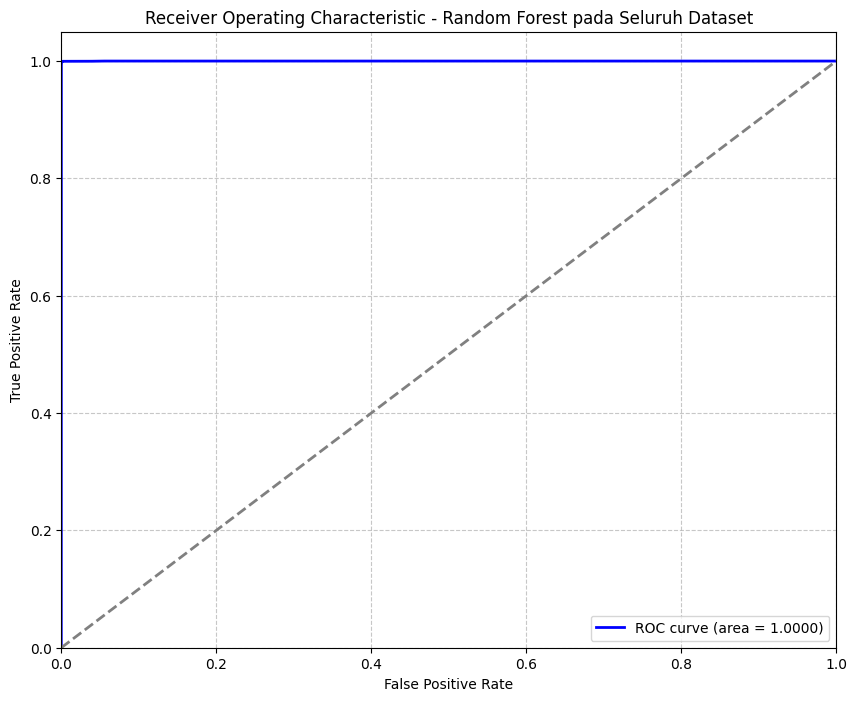


--- KESIMPULAN EVALUASI ---
Model Random Forest pada seluruh dataset mencapai akurasi 0.9992 (99.92%)
Precision: 0.9991, Recall: 0.9994, F1-Score: 0.9992


In [ ]:
  # Evaluasi model Random Forest menggunakan seluruh dataset

  print("\n" + "="*50)
  print("EVALUASI MODEL RANDOM FOREST PADA SELURUH DATASET")
  print("="*50)

  # 1. Standardisasi seluruh dataset fitur
  X_all = df.drop(['status', 'url'], axis=1)
  y_all = df['status']
  X_all_scaled = scaler.transform(X_all)

  # 2. Terapkan feature selection yang sama pada seluruh dataset
  X_all_selected = selector_model.transform(X_all_scaled)

  # 3. Gunakan model Random Forest terbaik untuk prediksi
  # - Menggunakan model final_rf yang sudah dilatih dengan hyperparameter terbaik
  y_all_pred = final_rf.predict(X_all_selected)
  y_all_proba = final_rf.predict_proba(X_all_selected)[:, 1]

  # 4. Hitung metrik evaluasi
  all_accuracy = accuracy_score(y_all, y_all_pred)
  all_precision = precision_score(y_all, y_all_pred)
  all_recall = recall_score(y_all, y_all_pred)
  all_f1 = f1_score(y_all, y_all_pred)
  fpr_all, tpr_all, _ = roc_curve(y_all, y_all_proba)
  all_roc_auc = auc(fpr_all, tpr_all)
  all_cm = confusion_matrix(y_all, y_all_pred)

  # 5. Tampilkan hasil evaluasi
  print("\nMetrik Performa Random Forest pada Seluruh Dataset:")
  print(f"Accuracy: {all_accuracy:.4f}")
  print(f"Precision: {all_precision:.4f}")
  print(f"Recall: {all_recall:.4f}")
  print(f"F1 Score: {all_f1:.4f}")
  print(f"ROC AUC: {all_roc_auc:.4f}")

  # 6. Tampilkan classification report
  print("\nClassification Report - Seluruh Dataset:")
  print(classification_report(y_all, y_all_pred, target_names=['Legitimate', 'Phishing']))

  # 7. Visualisasi confusion matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(all_cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Legitimate', 'Phishing'],
              yticklabels=['Legitimate', 'Phishing'])

  # Tambahkan anotasi persentase
  total = np.sum(all_cm)
  for i in range(all_cm.shape[0]):
      for j in range(all_cm.shape[1]):
          plt.text(j+0.5, i+0.7, f'({all_cm[i, j]/total:.1%})',
                  ha='center', va='center')

  plt.title('Random Forest Confusion Matrix - Seluruh Dataset', fontsize=15)
  plt.ylabel('Label Sebenarnya', fontsize=12)
  plt.xlabel('Label Prediksi', fontsize=12)
  plt.tight_layout()
  plt.savefig('rf_confusion_matrix_all_data.png', dpi=300, bbox_inches='tight')
  plt.show()

  # 8. Fungsi untuk menampilkan detail hasil klasifikasi
  def tampilkan_hasil_klasifikasi_all_data(X_all_selected, y_all, dataset_asli, model):
      """
      Fungsi untuk menampilkan hasil klasifikasi dengan URL asli untuk seluruh dataset
      """
      # Lakukan prediksi
      y_pred = model.predict(X_all_selected)

      # Dapatkan URL asli
      url_column = 'url' if 'url' in dataset_asli.columns else 'URL'

      if url_column in dataset_asli.columns:
          urls_asli = dataset_asli[url_column].reset_index(drop=True)
      else:
          urls_asli = [f"URL_{i+1}" for i in range(len(y_all))]

      # Buat DataFrame untuk menampilkan hasil
      hasil_df = pd.DataFrame({
          'URL Asli': urls_asli,
          'Label Sebenarnya': ["Phishing" if label == 1 else "Legitimate" for label in y_all],
          'Prediksi': ["Phishing" if pred == 1 else "Legitimate" for pred in y_pred],
          'Status Prediksi': ["Benar" if y_all.iloc[i] == y_pred[i] else "Salah" for i in range(len(y_all))]
      })

      # Set opsi tampilan untuk menampilkan sebagian baris
      pd.set_option('display.max_rows', 50)

      # Tampilkan 50 sampel hasil klasifikasi
      print("\n--- Hasil Klasifikasi Random Forest (50 Sampel) - Seluruh Dataset ---")
      print(hasil_df.head(50))

      # Reset opsi tampilan
      pd.reset_option('display.max_rows')

      # Hitung statistik hasil klasifikasi
      benar = sum(y_all == y_pred)
      total = len(y_all)
      akurasi = benar / total * 100

      phishing_benar = sum((y_all == 1) & (y_pred == 1))
      phishing_total = sum(y_all == 1)
      phishing_akurasi = phishing_benar / phishing_total * 100 if phishing_total > 0 else 0

      legitimate_benar = sum((y_all == 0) & (y_pred == 0))
      legitimate_total = sum(y_all == 0)
      legitimate_akurasi = legitimate_benar / legitimate_total * 100 if legitimate_total > 0 else 0

      print(f"\n--- Ringkasan Hasil Klasifikasi Seluruh Dataset ---")
      print(f"Total URL yang diuji: {total}")
      print(f"Total klasifikasi benar: {benar} ({akurasi:.2f}%)")
      print(f"Total klasifikasi salah: {total - benar} ({100 - akurasi:.2f}%)")
      print(f"URL Phishing terdeteksi benar: {phishing_benar} dari {phishing_total} ({phishing_akurasi:.2f}%)")
      print(f"URL Legitimate terdeteksi benar: {legitimate_benar} dari {legitimate_total} ({legitimate_akurasi:.2f}%)")

      # Analisis URL yang salah klasifikasi
      false_positives = hasil_df[(hasil_df['Label Sebenarnya'] == 'Legitimate') &
                                (hasil_df['Prediksi'] == 'Phishing')]
      false_negatives = hasil_df[(hasil_df['Label Sebenarnya'] == 'Phishing') &
                                (hasil_df['Prediksi'] == 'Legitimate')]

      print(f"\nURL Legitimate yang salah klasifikasi sebagai Phishing (False Positive): {len(false_positives)}")
      print(f"URL Phishing yang salah klasifikasi sebagai Legitimate (False Negative): {len(false_negatives)}")

      # Tampilkan beberapa contoh kesalahan klasifikasi
      if len(false_positives) > 0:
          print("\n--- Contoh False Positive (max 10) ---")
          print(false_positives.head(min(10, len(false_positives))))

      if len(false_negatives) > 0:
          print("\n--- Contoh False Negative (max 10) ---")
          print(false_negatives.head(min(10, len(false_negatives))))

      return hasil_df

  # 9. Jalankan fungsi klasifikasi
  try:
      # Pastikan y_all dalam format Series
      if not isinstance(y_all, pd.Series):
          y_all = pd.Series(y_all)

      # Lakukan klasifikasi dan tampilkan hasilnya
      hasil_klasifikasi_all = tampilkan_hasil_klasifikasi_all_data(X_all_selected, y_all, df, final_rf)

      # Simpan hasil ke CSV
      hasil_klasifikasi_all.to_csv('/content/drive/MyDrive/Dataset/hasil_klasifikasi_seluruh_dataset.csv', index=False)
      print("\nHasil klasifikasi dengan URL asli telah disimpan ke file CSV.")

  except Exception as e:
      print(f"Error: {e}")
      import traceback
      traceback.print_exc()

  # 10. Analisis performa lebih lanjut
  print("\n" + "="*50)
  print("ANALISIS PERFORMA LANJUTAN - RANDOM FOREST PADA SELURUH DATASET")
  print("="*50)

  # Visualisasi kurva ROC
  plt.figure(figsize=(10, 8))
  plt.plot(fpr_all, tpr_all, color='blue', lw=2,
          label=f'ROC curve (area = {all_roc_auc:.4f})')
  plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic - Random Forest pada Seluruh Dataset')
  plt.legend(loc="lower right")
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.savefig('rf_roc_all_data.png', dpi=300, bbox_inches='tight')
  plt.show()

  # Tampilkan kesimpulan evaluasi
  print("\n--- KESIMPULAN EVALUASI ---")
  print(f"Model Random Forest pada seluruh dataset mencapai akurasi {all_accuracy:.4f} ({all_accuracy*100:.2f}%)")
  print(f"Precision: {all_precision:.4f}, Recall: {all_recall:.4f}, F1-Score: {all_f1:.4f}")




--- Hasil Klasifikasi Random Forest (50 Sampel) ---
                                             URL Asli Label Sebenarnya  \
0                       http://www.muttenzerkurve.ch/         Phishing   
1                       https://fbrq2.codesandbox.io/         Phishing   
2                      http://www.lustige-galerie.de/         Phishing   
3   http://yiloo.s3-ap-northeast-1.amazonaws.com/o...       Legitimate   
4   http://outdoorism.com.au/includes/customer/e90...       Legitimate   
5                           http://www.checkbbsms.com       Legitimate   
6                               http://vkfeart.hop.ru       Legitimate   
7                      https://github.com/mkdoc/mkcli       Legitimate   
8   https://en.wikipedia.org/wiki/Oracle_Database_...         Phishing   
9                       http://189.36.52.206/#!/login         Phishing   
10  https://en.wikibooks.org/wiki/PHP_Programming/...       Legitimate   
11                             https://motosaigon.vn/      

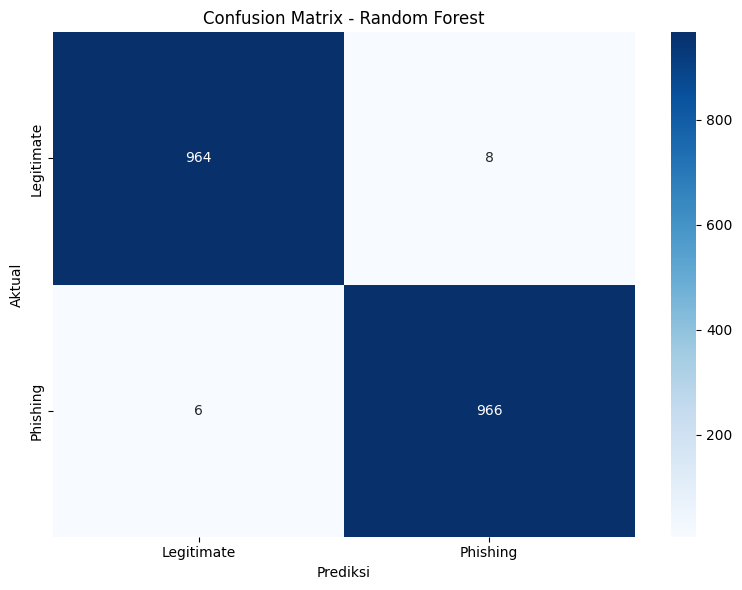


--- Ringkasan Hasil Klasifikasi ---
Total URL yang diuji: 1944
Total klasifikasi benar: 1930 (99.28%)
Total klasifikasi salah: 14 (0.72%)
URL Phishing terdeteksi benar: 966 dari 972 (99.38%)
URL Legitimate terdeteksi benar: 964 dari 972 (99.18%)

--- URL Phishing yang Tidak Terdeteksi (False Negative) ---
                                               URL Asli Label Sebenarnya  \
123   https://www.computerhope.com/jargon/m/memstick...         Phishing   
190   https://www.marches-publics.gouv.fr/?page=entr...         Phishing   
761   http://www.finderonly.net/blog/wp-admin/adminc...         Phishing   
1097                   https://www.rainbowcoast.com.au/         Phishing   
1632  http://www.quotes-inspirational.com/quotes/pas...         Phishing   
1923                         https://www.dissernet.org/         Phishing   

        Prediksi Status Prediksi  
123   Legitimate           Salah  
190   Legitimate           Salah  
761   Legitimate           Salah  
1097  Legitimate   

In [ ]:
def dapatkan_url_asli(dataset_asli, n_samples):
    """
    Fungsi sederhana untuk mendapatkan n_samples URL dari dataset asli
    """
    # Check which column name is used for URLs
    url_column = 'url' if 'url' in dataset_asli.columns else 'URL'

    if url_column in dataset_asli.columns:
        return dataset_asli[url_column].iloc[-n_samples:].reset_index(drop=True)
    else:
        return [f"URL_{i+1}" for i in range(n_samples)]

# Fungsi untuk menampilkan hasil klasifikasi dengan URL asli
def tampilkan_hasil_klasifikasi(X_test, y_test, dataset_asli):
    # Latih ulang model RandomForest langsung di sini
    from sklearn.ensemble import RandomForestClassifier

    # Gunakan model RandomForest dengan parameter default
    rf_model = RandomForestClassifier(random_state=42)

    # Ambil data training dari variabel yang sudah ada
    rf_model.fit(X_train_val, y_train_val)

    # Prediksi kelas
    y_pred = rf_model.predict(X_test)

    # Dapatkan URL asli
    urls_asli = dapatkan_url_asli(dataset_asli, len(y_test))

    # Buat DataFrame untuk menampilkan hasil
    hasil_df = pd.DataFrame({
        'URL Asli': urls_asli,
        'Label Sebenarnya': ["Phishing" if label == 1 else "Legitimate" for label in y_test],
        'Prediksi': ["Phishing" if pred == 1 else "Legitimate" for pred in y_pred],
        'Status Prediksi': ["Benar" if y_test.iloc[i] == y_pred[i] else "Salah" for i in range(len(y_test))]
    })

    # Set opsi tampilan untuk menampilkan semua baris
    pd.set_option('display.max_rows', 50)

    # Tampilkan 50 sampel hasil klasifikasi
    print("\n--- Hasil Klasifikasi Random Forest (50 Sampel) ---")
    print(hasil_df.head(50))

    # Reset opsi tampilan
    pd.reset_option('display.max_rows')

    # Hitung dan tampilkan metrik evaluasi
    print("\n--- Metrik Evaluasi ---")
    print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

    # Tampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Phishing'],
                yticklabels=['Legitimate', 'Phishing'])
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.tight_layout()
    plt.show()

    # Hitung statistik hasil klasifikasi
    benar = sum(y_test == y_pred)
    total = len(y_test)
    akurasi = benar / total * 100

    phishing_benar = sum((y_test == 1) & (y_pred == 1))
    phishing_total = sum(y_test == 1)
    phishing_akurasi = phishing_benar / phishing_total * 100 if phishing_total > 0 else 0

    legitimate_benar = sum((y_test == 0) & (y_pred == 0))
    legitimate_total = sum(y_test == 0)
    legitimate_akurasi = legitimate_benar / legitimate_total * 100 if legitimate_total > 0 else 0

    print(f"\n--- Ringkasan Hasil Klasifikasi ---")
    print(f"Total URL yang diuji: {total}")
    print(f"Total klasifikasi benar: {benar} ({akurasi:.2f}%)")
    print(f"Total klasifikasi salah: {total - benar} ({100 - akurasi:.2f}%)")
    print(f"URL Phishing terdeteksi benar: {phishing_benar} dari {phishing_total} ({phishing_akurasi:.2f}%)")
    print(f"URL Legitimate terdeteksi benar: {legitimate_benar} dari {legitimate_total} ({legitimate_akurasi:.2f}%)")

    # Analisis URL phishing yang terdeteksi salah (false negative)
    false_negatives = hasil_df[(hasil_df['Label Sebenarnya'] == 'Phishing') &
                               (hasil_df['Prediksi'] == 'Legitimate')]

    if len(false_negatives) > 0:
        print("\n--- URL Phishing yang Tidak Terdeteksi (False Negative) ---")
        print(false_negatives.head(min(10, len(false_negatives))))

    # Analisis URL legitimate yang terdeteksi salah (false positive)
    false_positives = hasil_df[(hasil_df['Label Sebenarnya'] == 'Legitimate') &
                               (hasil_df['Prediksi'] == 'Phishing')]

    if len(false_positives) > 0:
        print("\n--- URL Legitimate yang Terdeteksi sebagai Phishing (False Positive) ---")
        print(false_positives.head(min(10, len(false_positives))))

    return hasil_df

# Jalankan fungsi untuk menampilkan klasifikasi
try:
    # Pastikan y_test dalam format Series
    if not isinstance(y_test, pd.Series):
        y_test = pd.Series(y_test)

    # Menggunakan df sebagai pengganti dataset_asli yang tidak terdefinisi
    hasil_klasifikasi = tampilkan_hasil_klasifikasi(X_test_selected, y_test, df)

    # Simpan hasil ke CSV
    hasil_klasifikasi.to_csv('/content/drive/MyDrive/Dataset/hasil_klasifikasi.csv', index=False)
    print("\nHasil klasifikasi dengan URL asli telah disimpan ke file CSV.")

except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()